In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15,12)

##  Web Page Phishing Prediction  Using Random Forest an ML (Machine Learning) Algorithm


# Loading the data

We will start by loading the provided csv data using pandas read_csv method

In [2]:
data = pd.read_csv("Phishing_Legitimate_full.csv")

### Here we'll convert data  of float64 to int64 data

As we can see the data has 10k rows and 50 columns including labels

In [3]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [4]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

### Display of the data


In [5]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
5158,5159,2,0,4,60,0,0,0,0,0,0,0,0,0,20,1,1,0,0,1,0,11,31,10,0,0,0,0.00,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
7564,7565,1,0,5,83,8,0,0,0,0,0,0,0,0,8,1,1,0,0,1,0,14,62,0,0,0,0,0.46,1.000000,1,1,1,1,1,0.026667,0,0,0,0,0,1,0,0,1,-1,-1,0,0,0,0
4943,4944,2,1,4,47,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,12,28,0,0,0,0,0.00,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
6397,6398,1,0,3,66,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,49,0,0,0,0,0.00,0.307692,0,1,0,0,0,0.159420,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9551,9552,3,1,1,45,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,19,12,6,0,0,0,0.00,0.290323,0,1,1,0,1,0.000000,0,0,0,0,0,1,0,0,1,1,0,-1,0,1,0


### Provides Data Summary Statistics


In [6]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

### Analysing of the Pishing Data is  Balanced or Imbalanced 


<AxesSubplot:>

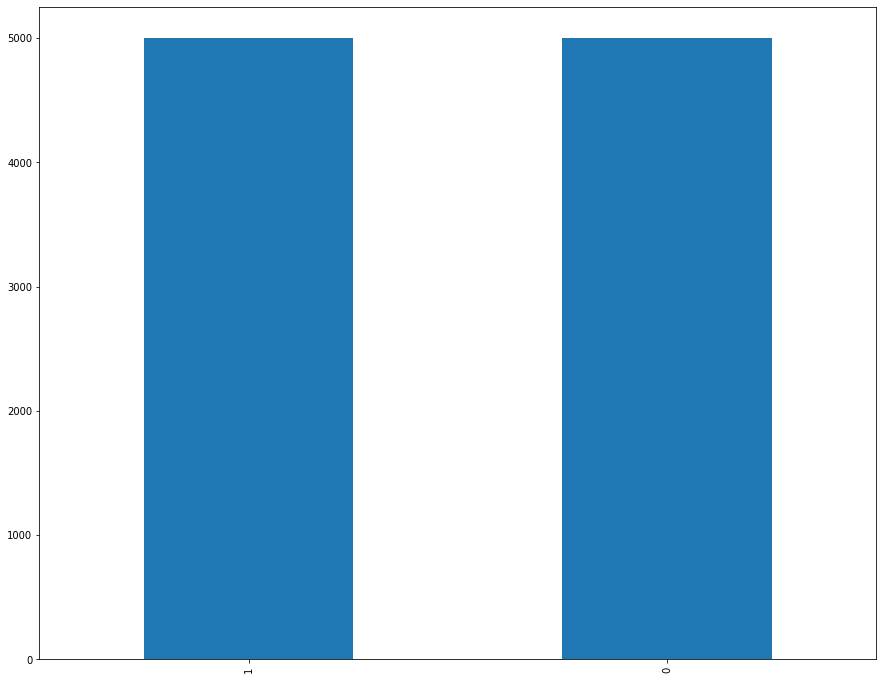

In [7]:
data['labels'].value_counts().plot(kind='bar')

#### Data Correlation(Spearman) we can find which features are linearly correlated in terms of predicting if a site is phising or not

In [8]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

### Checking the First -> 10 columns


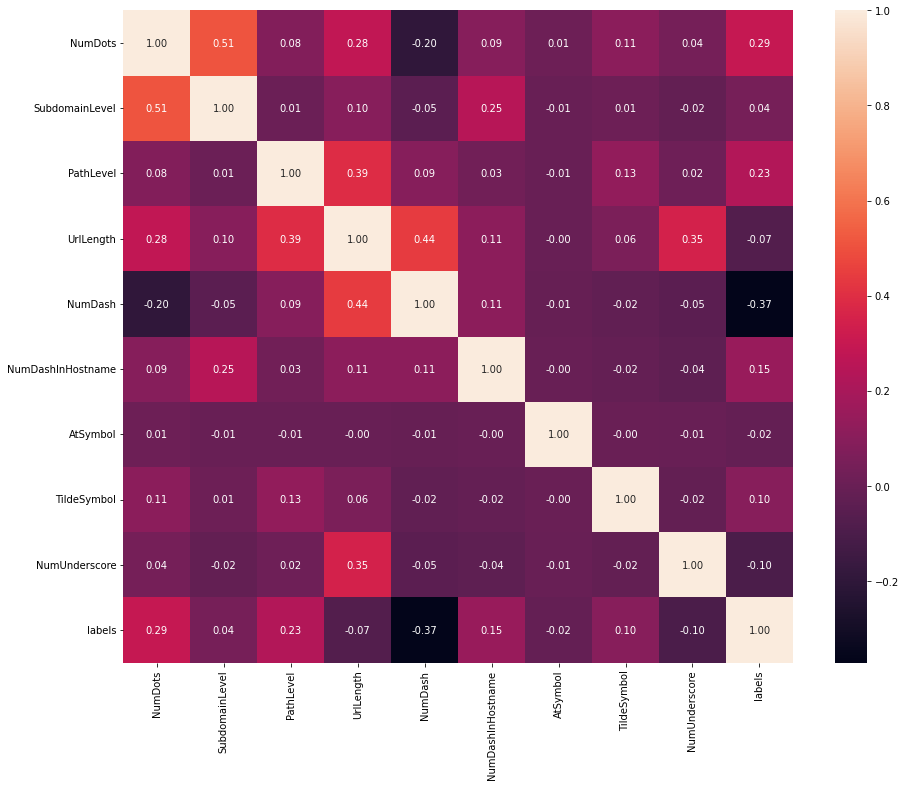

In [9]:
corr_heatmap(data, 0, 10)

# Columns 10 to 20

There are no strong or even medium level strength correlation features with labels

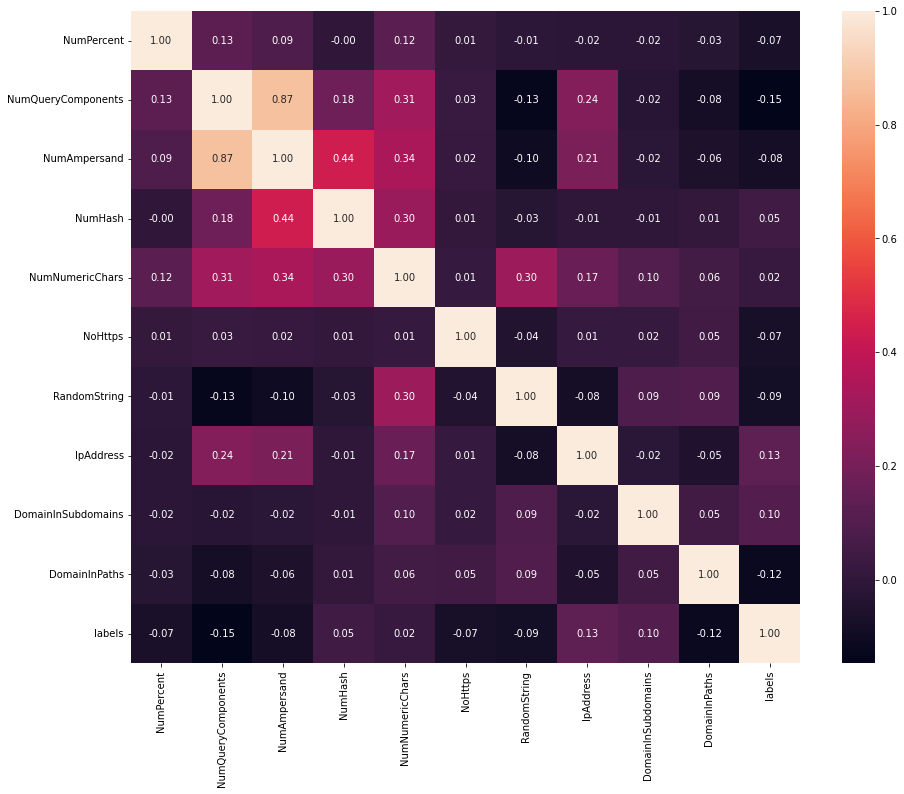

In [10]:
corr_heatmap(data, 10, 20)

# Columns 20 to 30

Still no strong correlation feature

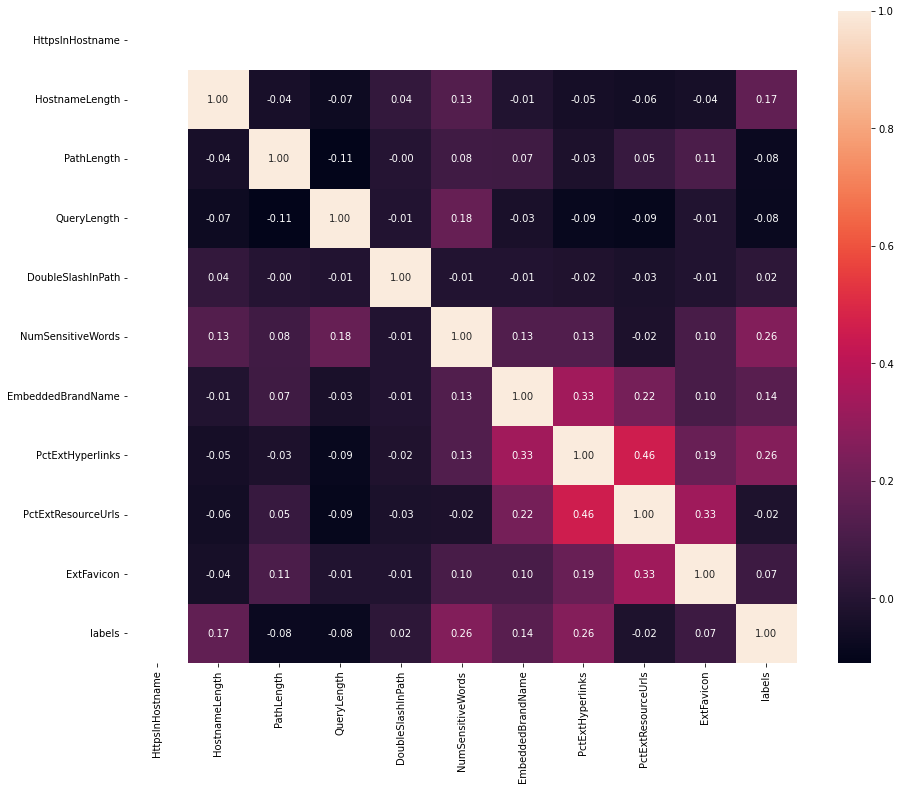

In [11]:
corr_heatmap(data, 20, 30)

# Columns 30 to 40

Well here we have a few features that are linearly correlated to our dep variable

* InsecureForms shows that as the value is higher so the probability of being a phising site
* PctNullSelfRedirectHyperlinks shows the same positive correlation as InsecureForms
* FequentDomainNameMismatch shows that it has medium linear correlation in positive direction
* SubmitInfoToEmail seems to indicate that sites that ask users to submit their details to emails seems to be more high probability for phising

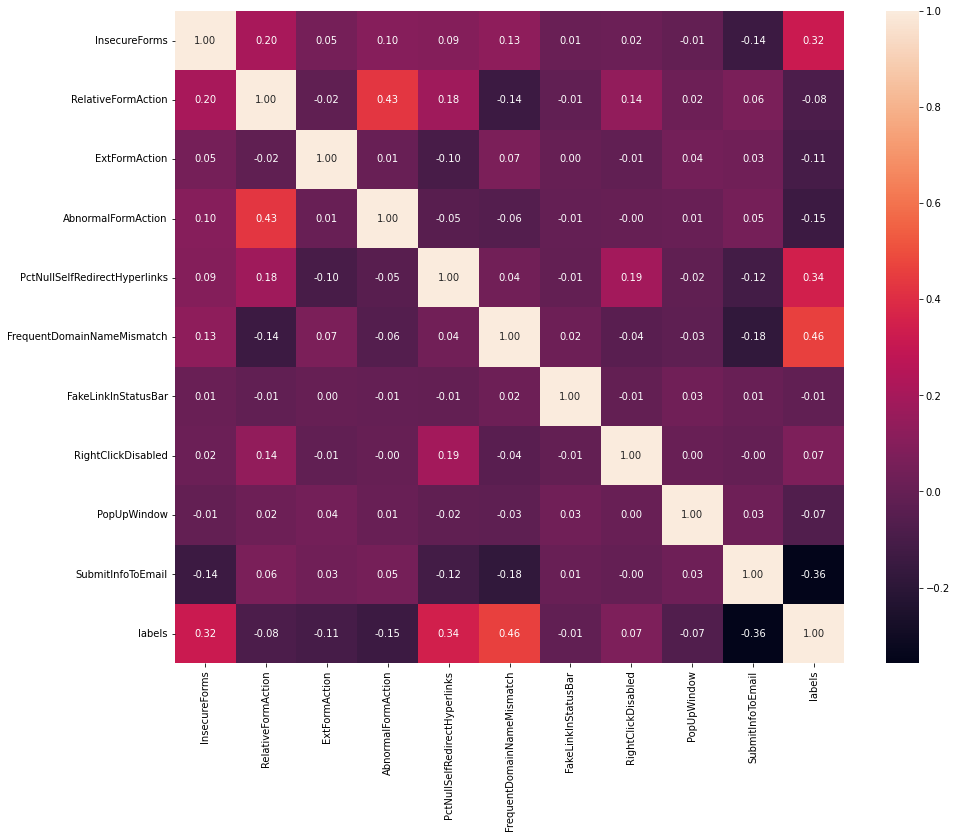

In [12]:
corr_heatmap(data, 30, 40)

# Columsn 40 to 50

The only column in this group that has some correlation with labels is PctExtNullSelfRedirectHyperlinksRT and it has negative effect towards labels which could mean that when the number of percent of null self redirect hyperlinks occur hence the probabiliy of phising increases

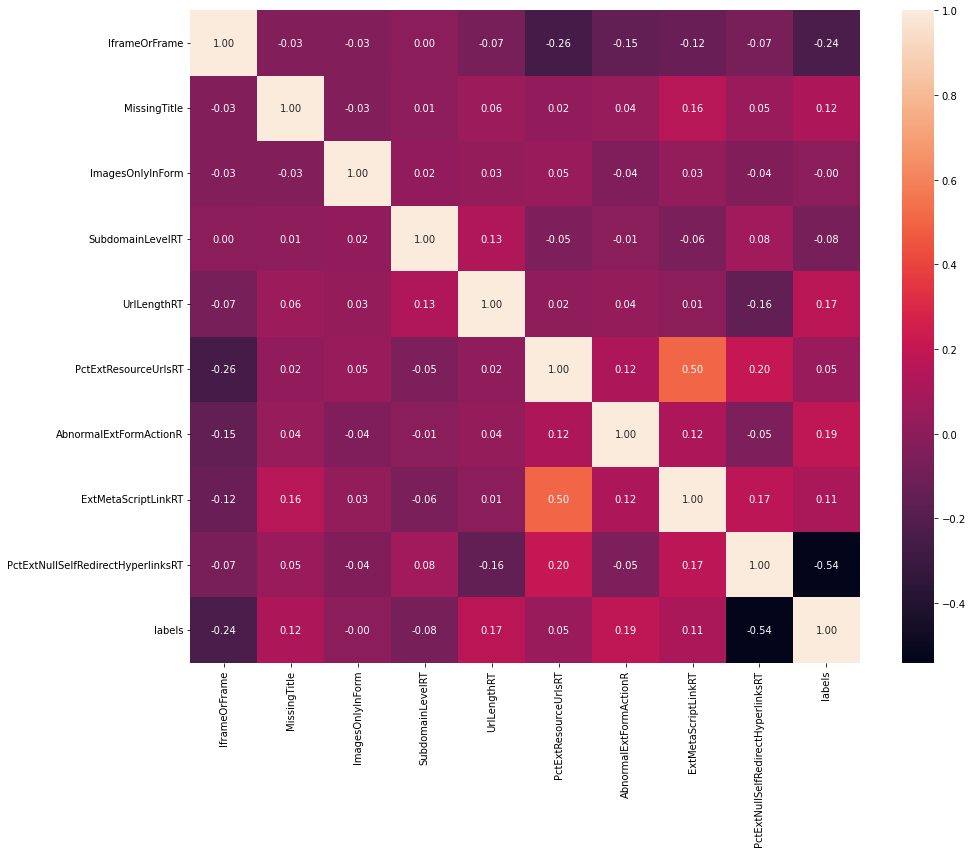

In [13]:
corr_heatmap(data, 40, 50)

#### Checking for the Mutual Information classifier to find non linear and linear correlation betweem the features and labels

In [14]:
from sklearn.feature_selection import mutual_info_classif

In [15]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [16]:
discrete_features = X.dtypes == int

### Extracting the Features and displaying of Distribution Plots

In [17]:
num_features = X.columns[X.dtypes != 'object']
print(num_features.shape)
num_features

(48,)


Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

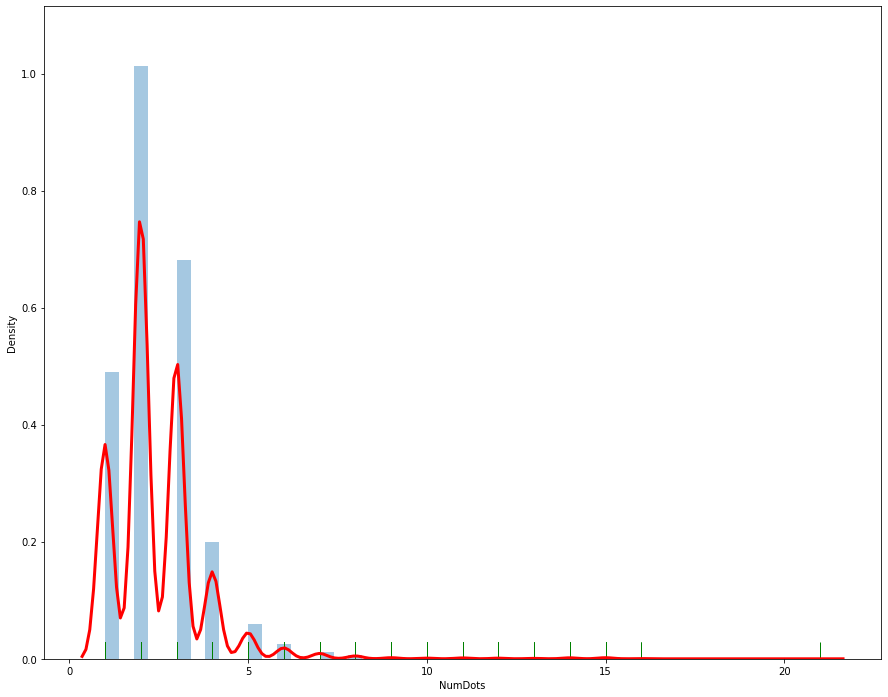

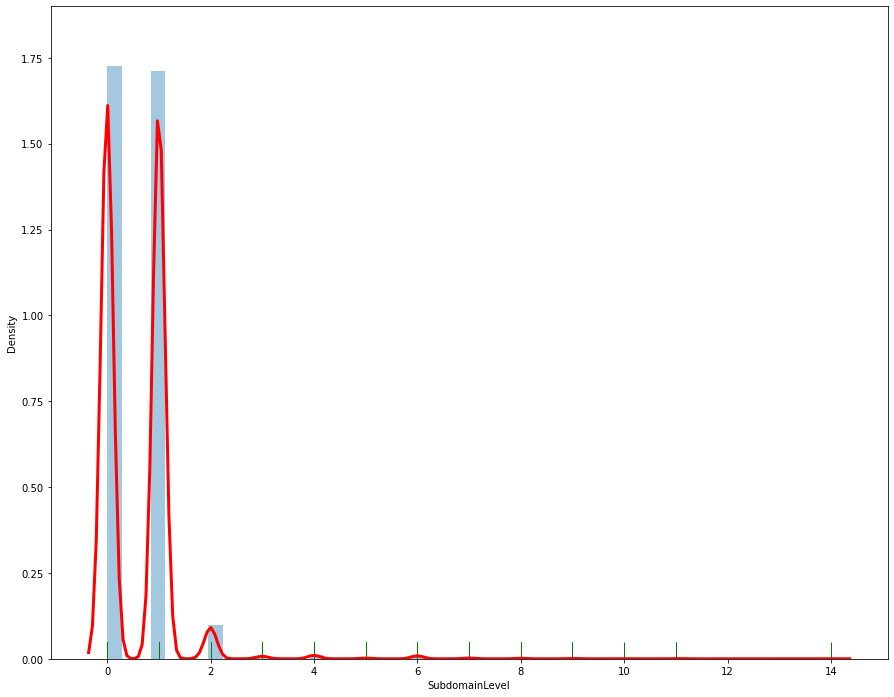

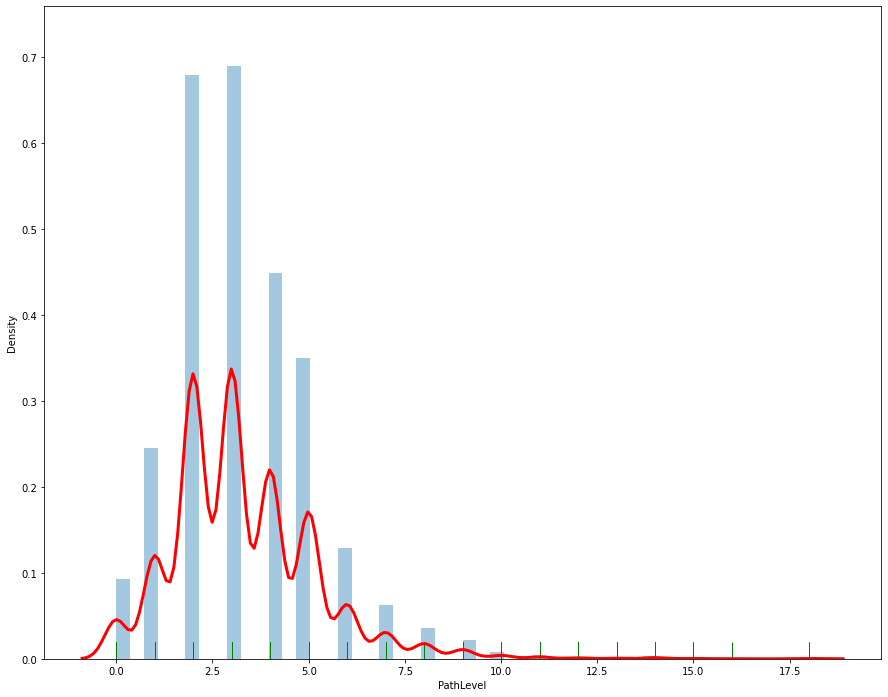

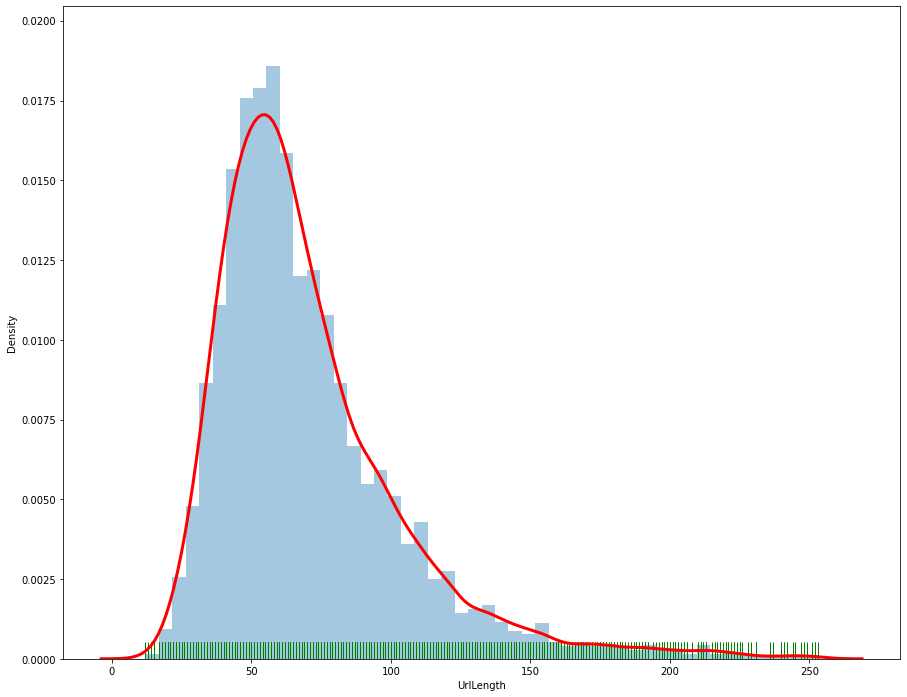

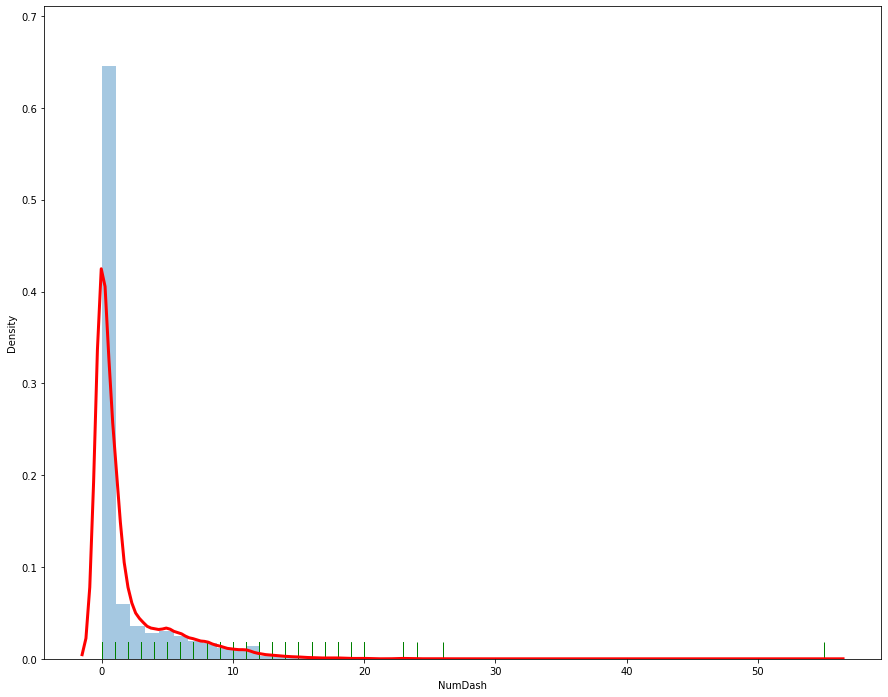

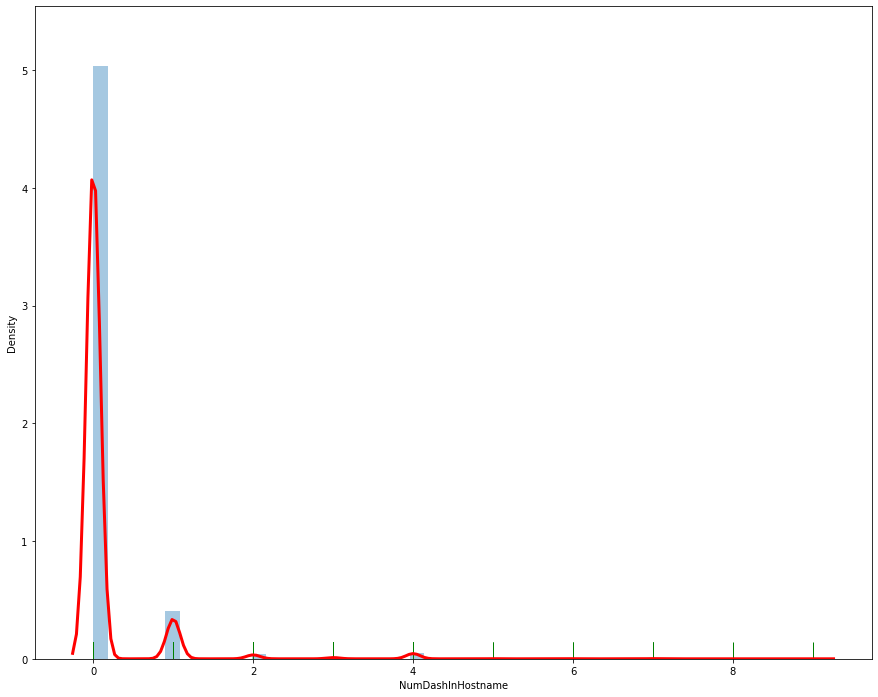

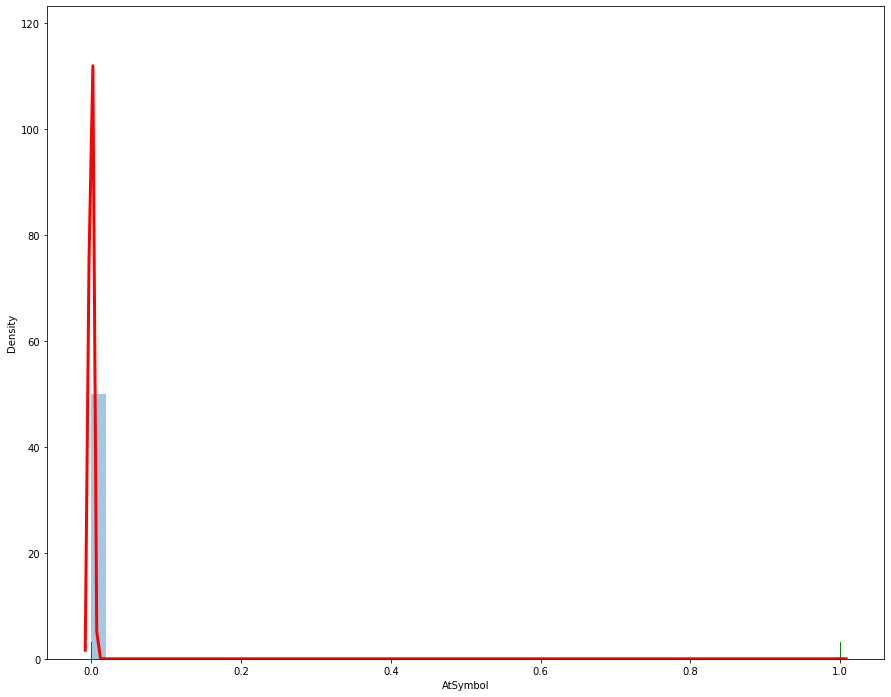

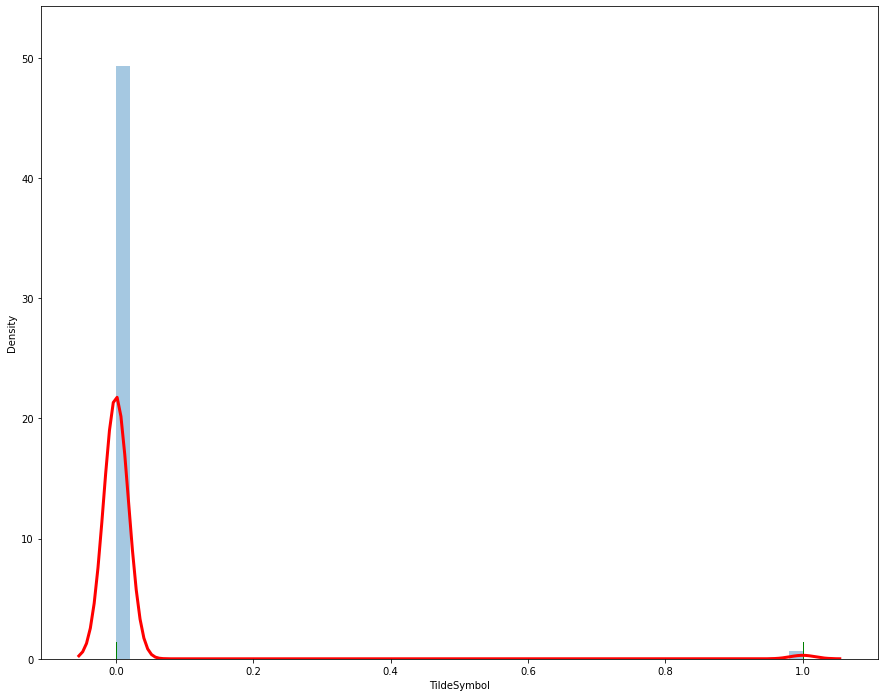

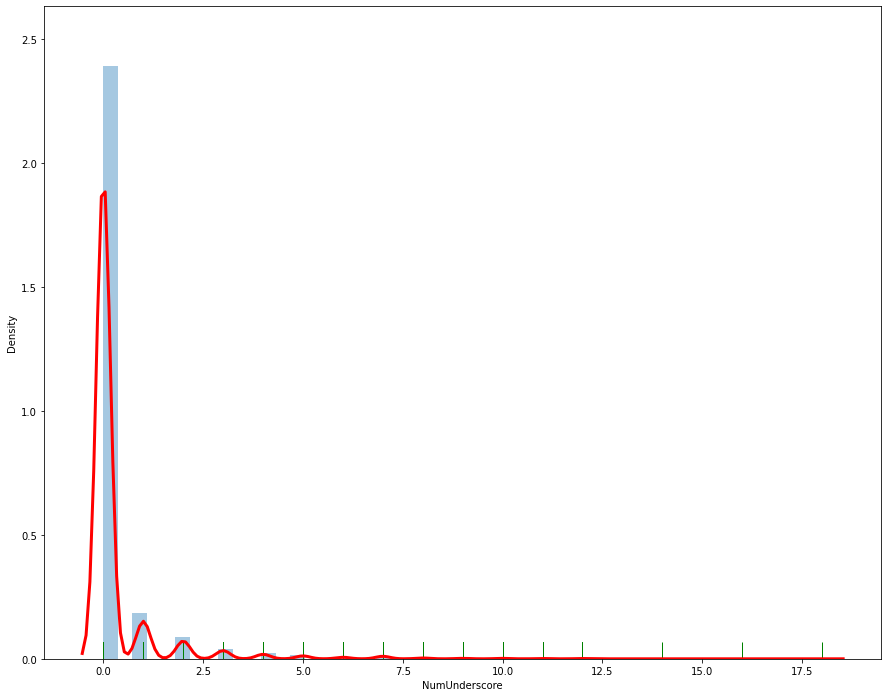

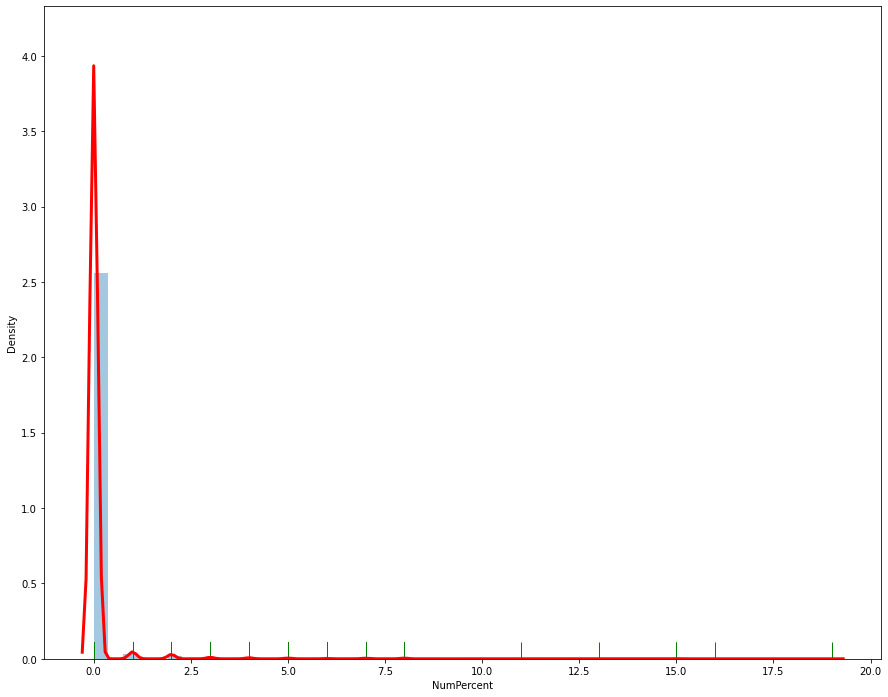

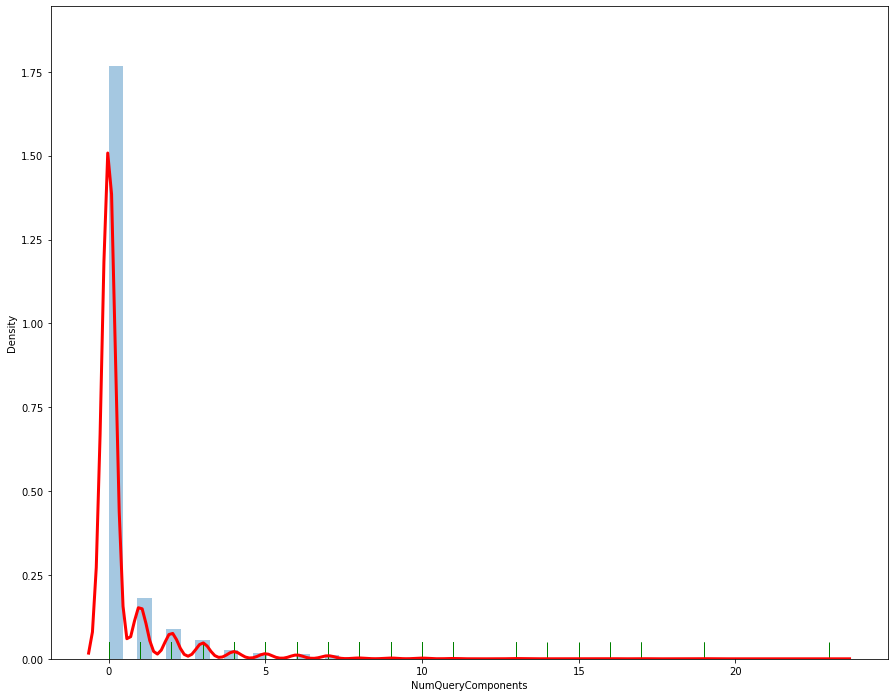

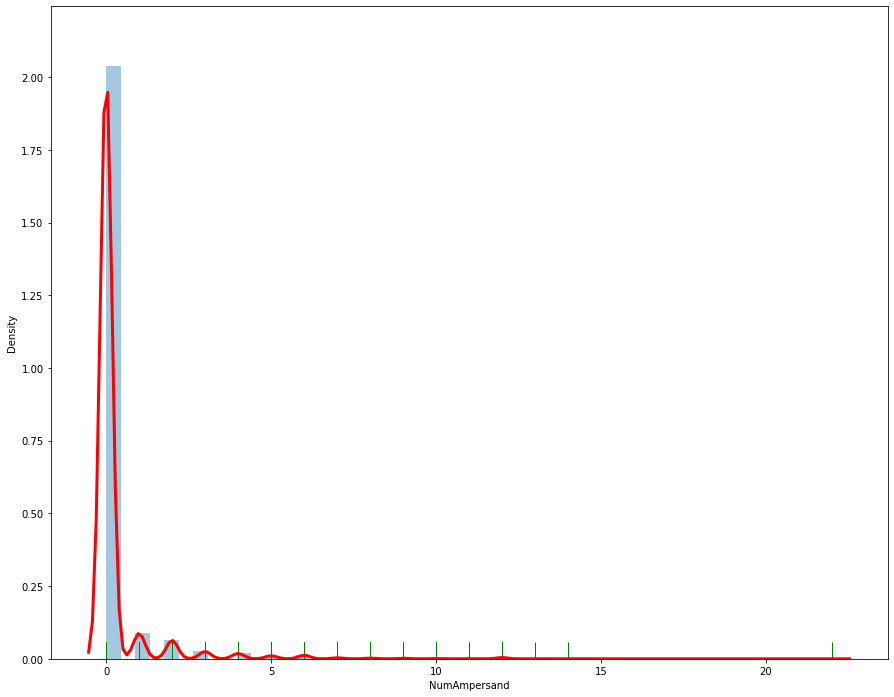

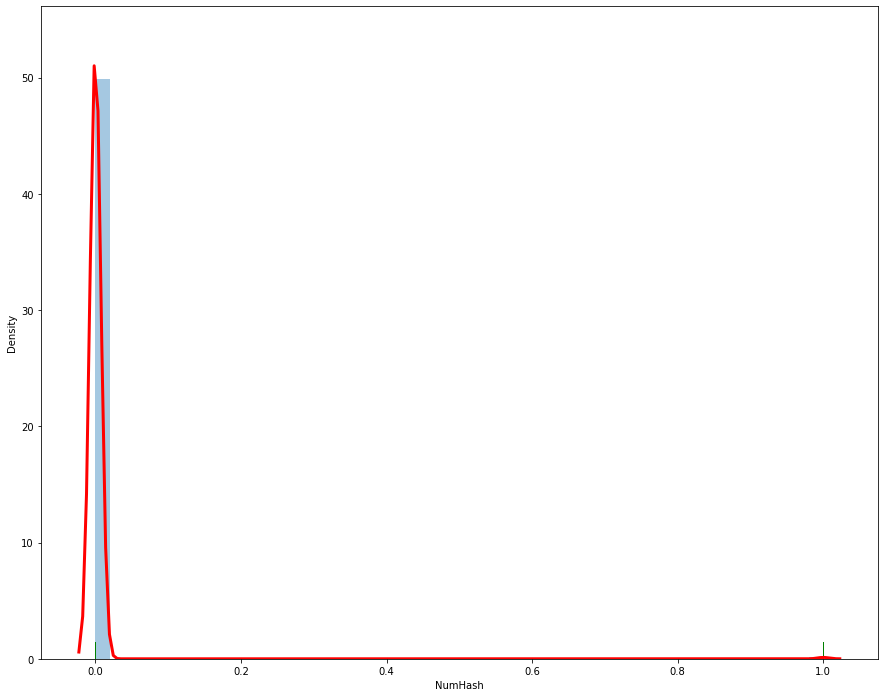

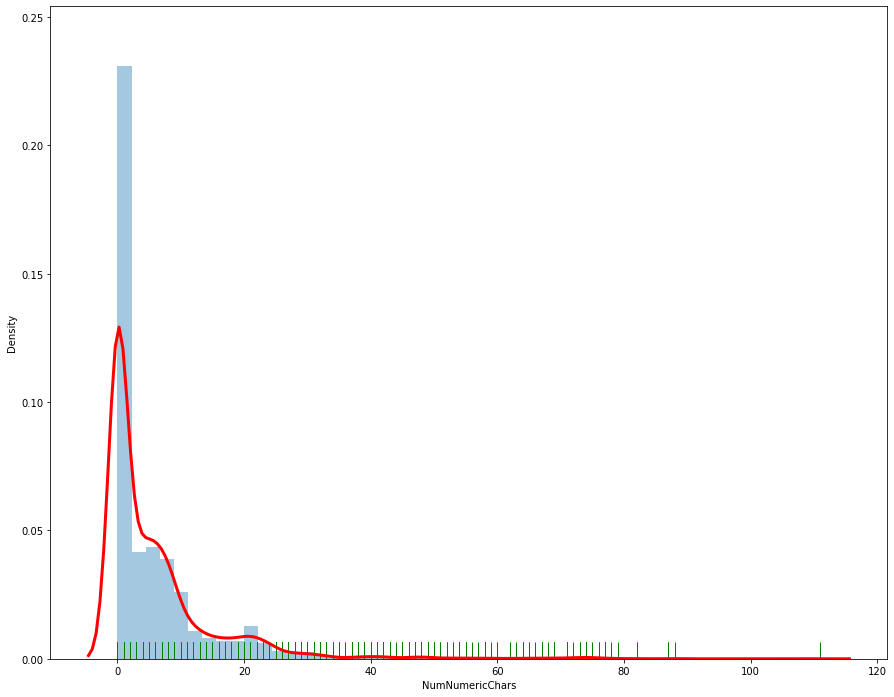

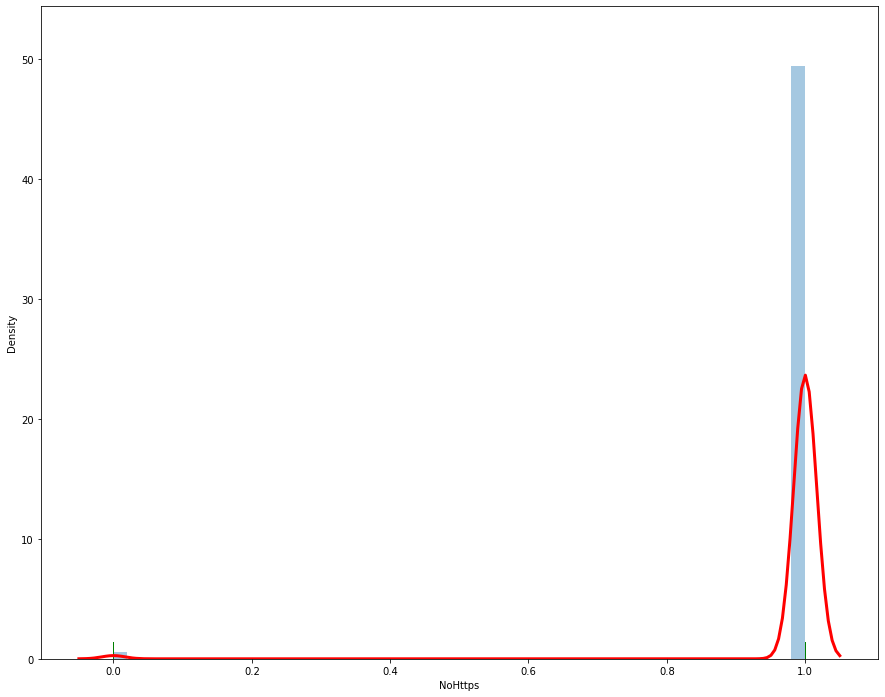

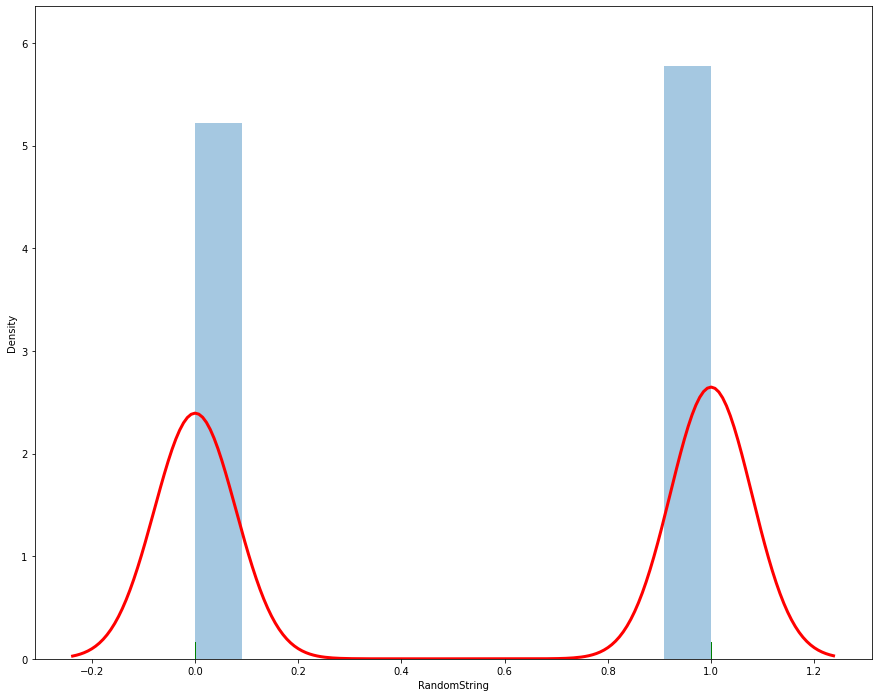

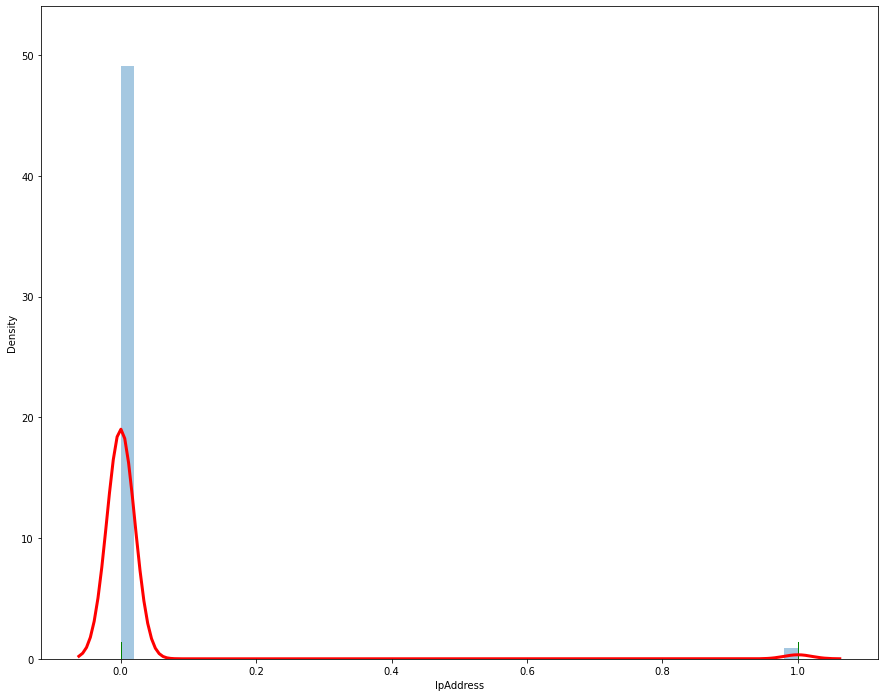

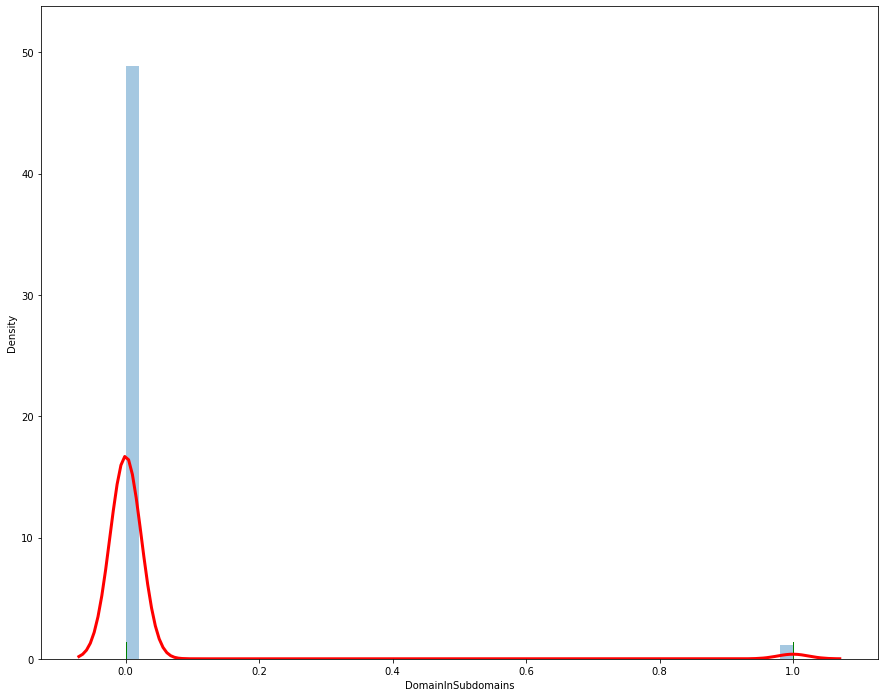

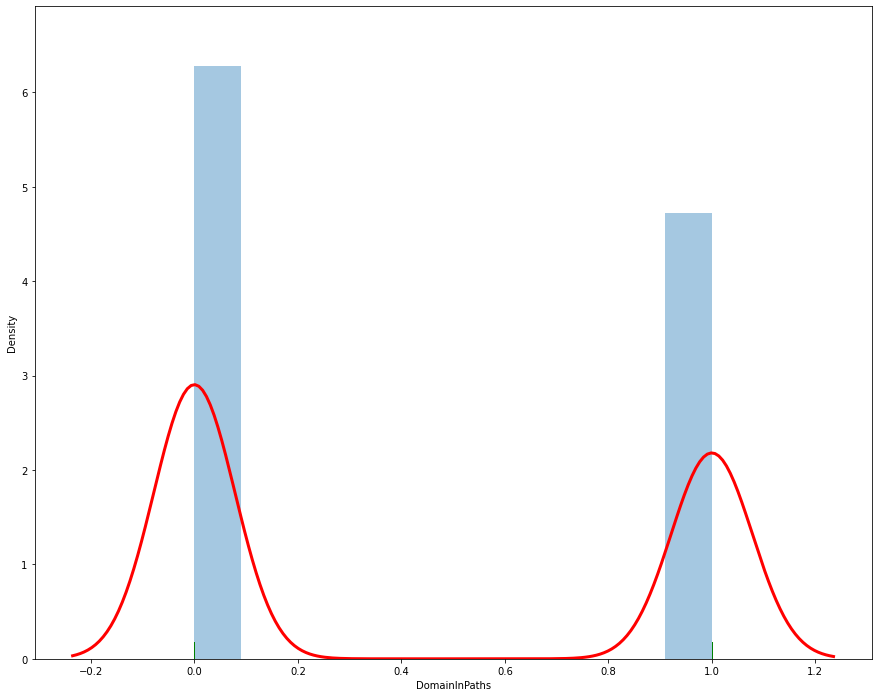

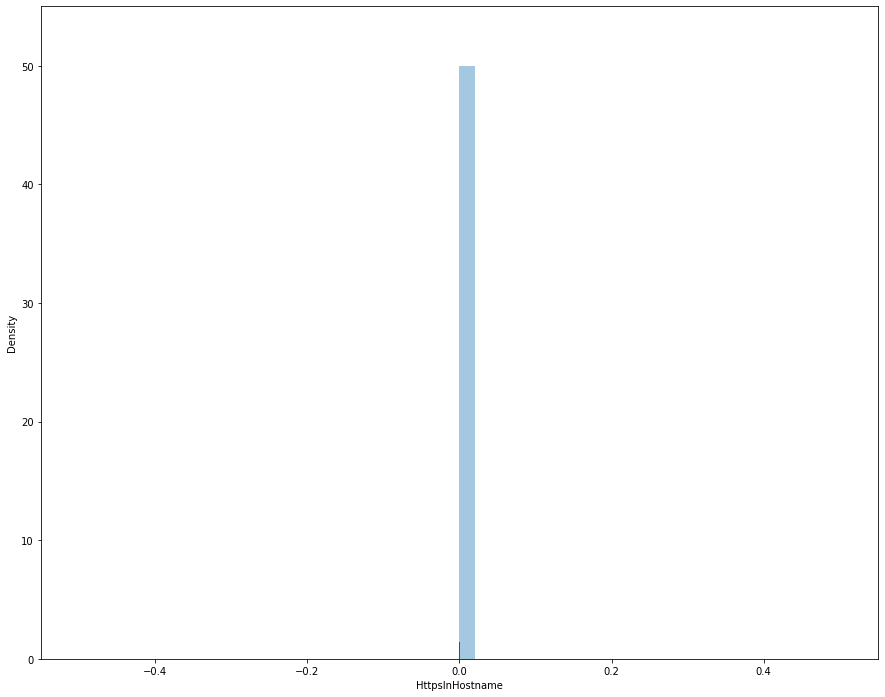

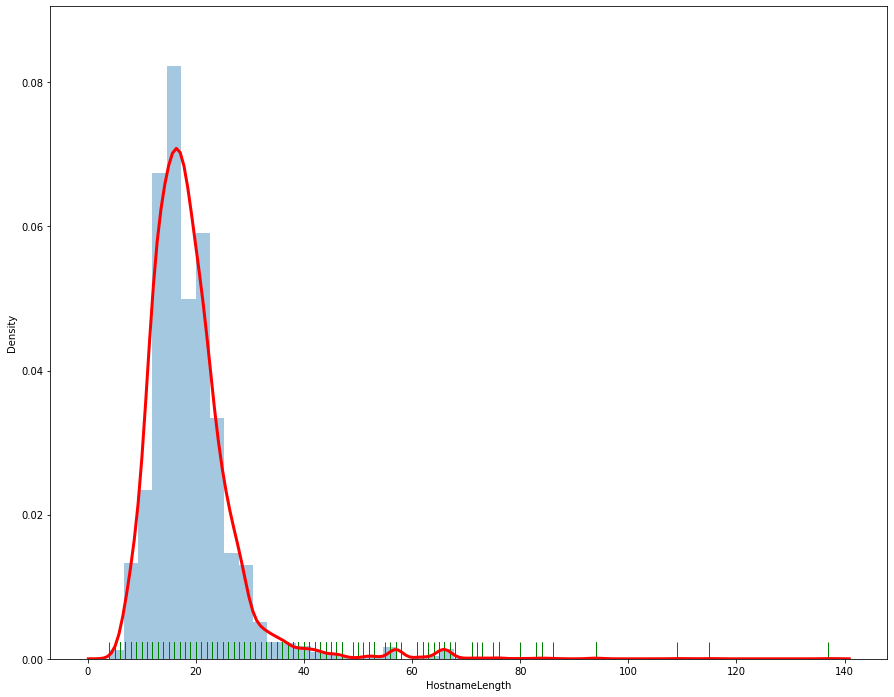

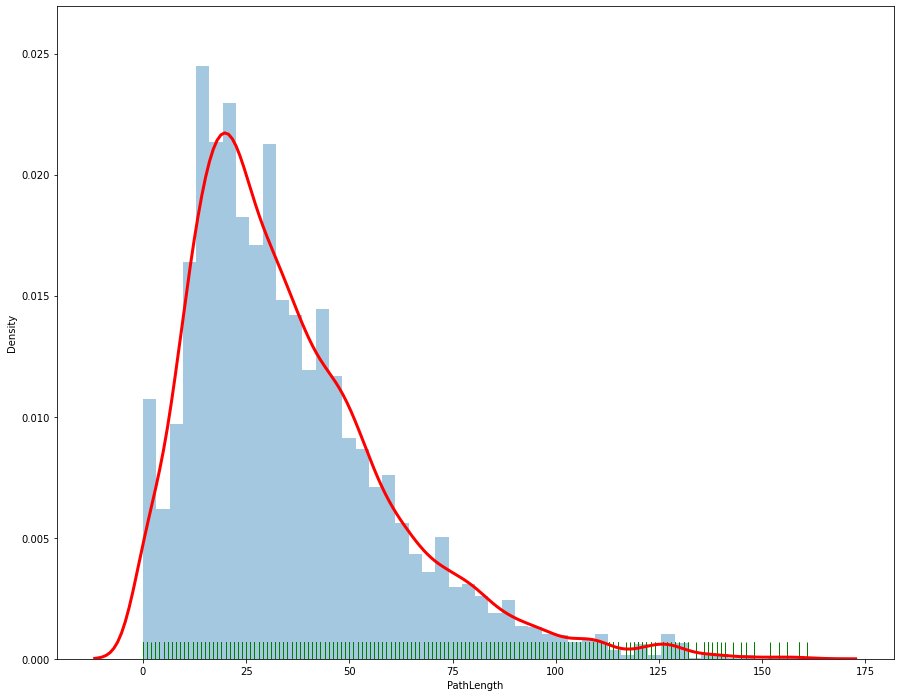

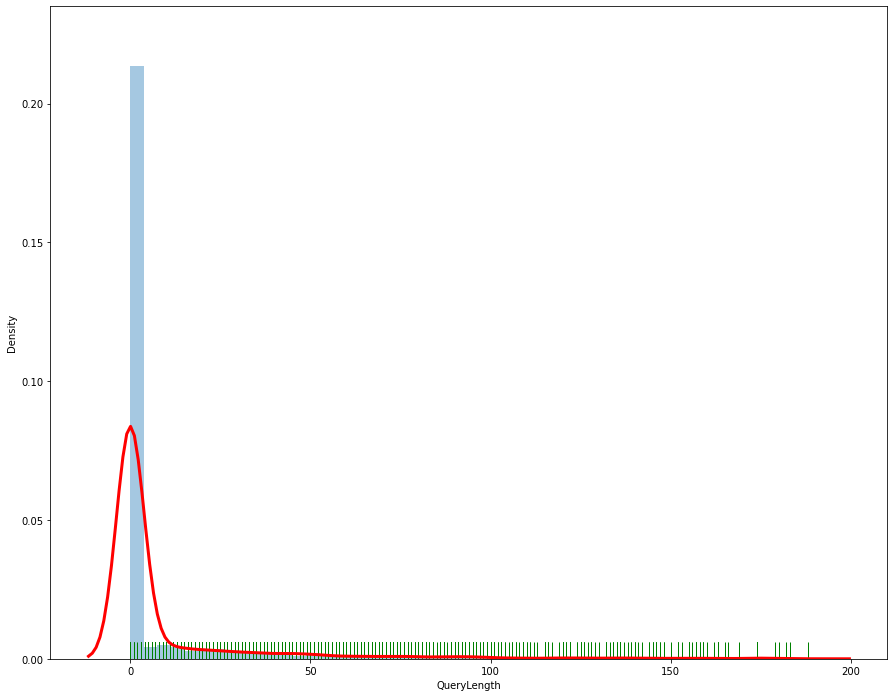

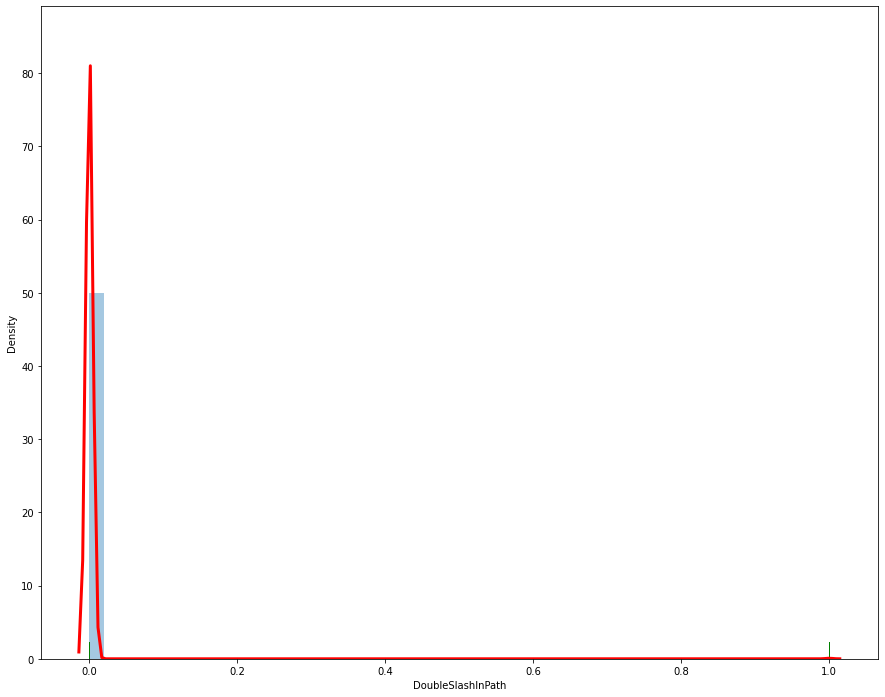

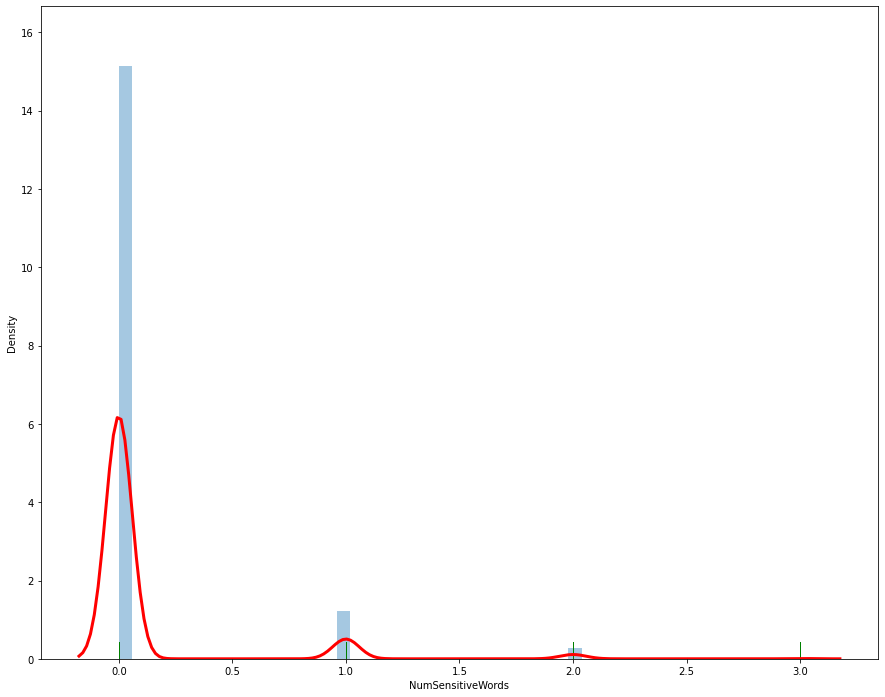

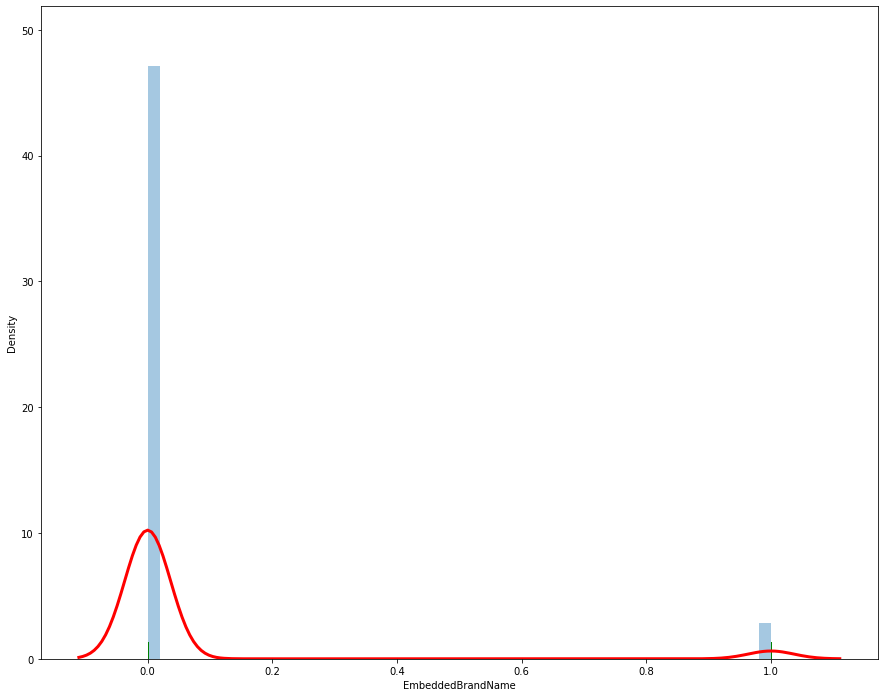

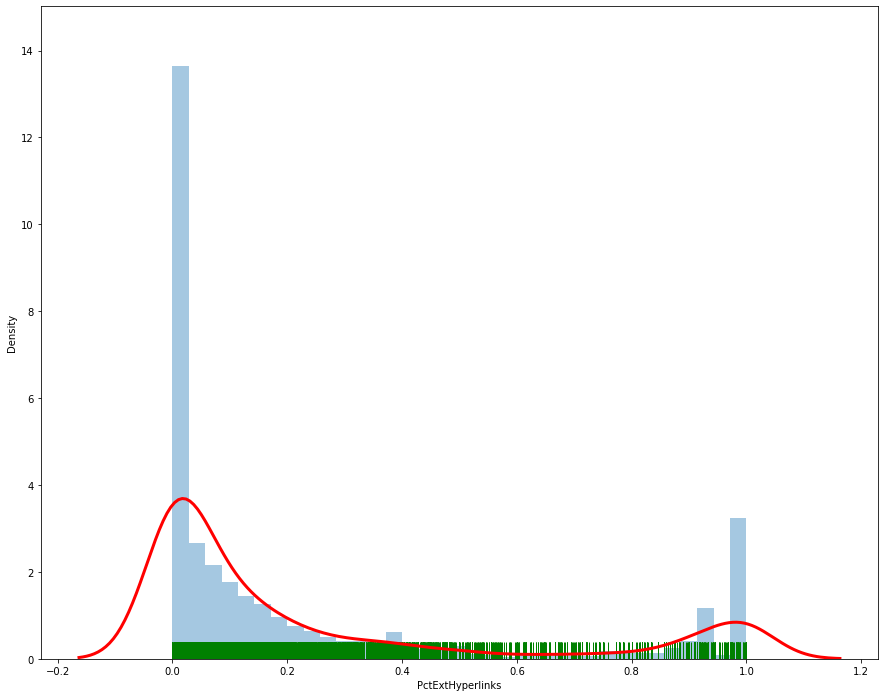

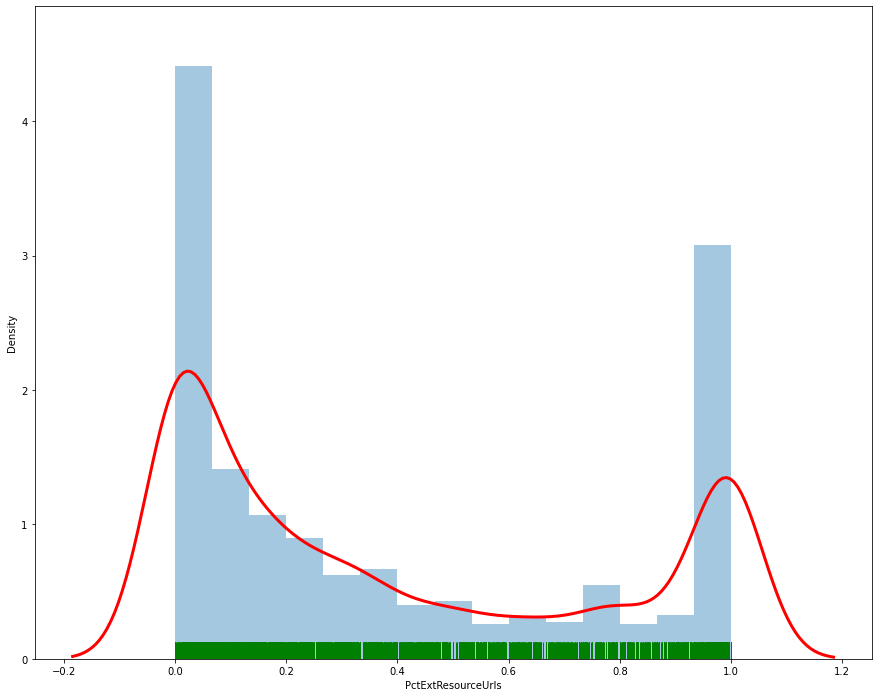

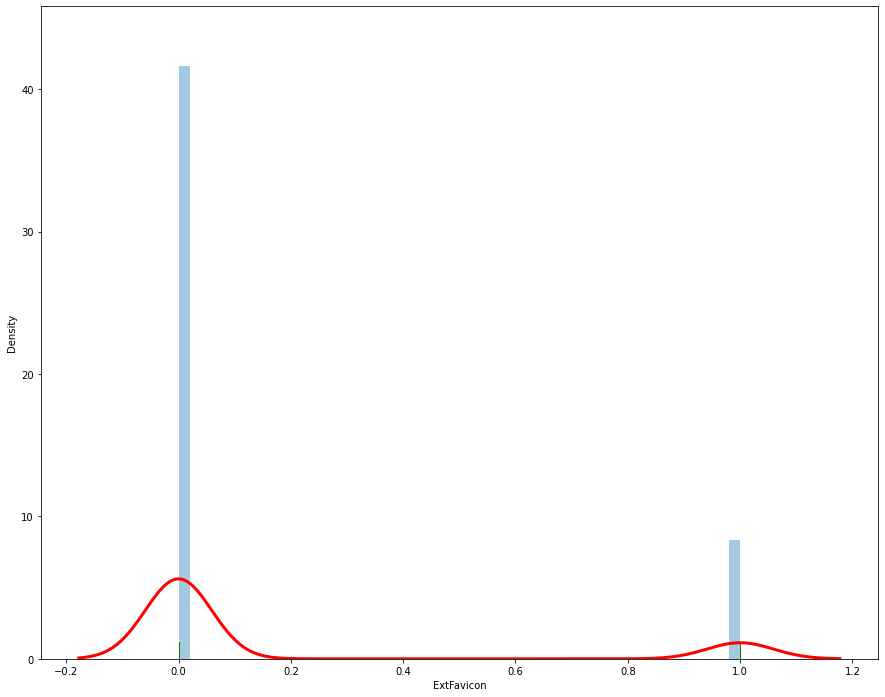

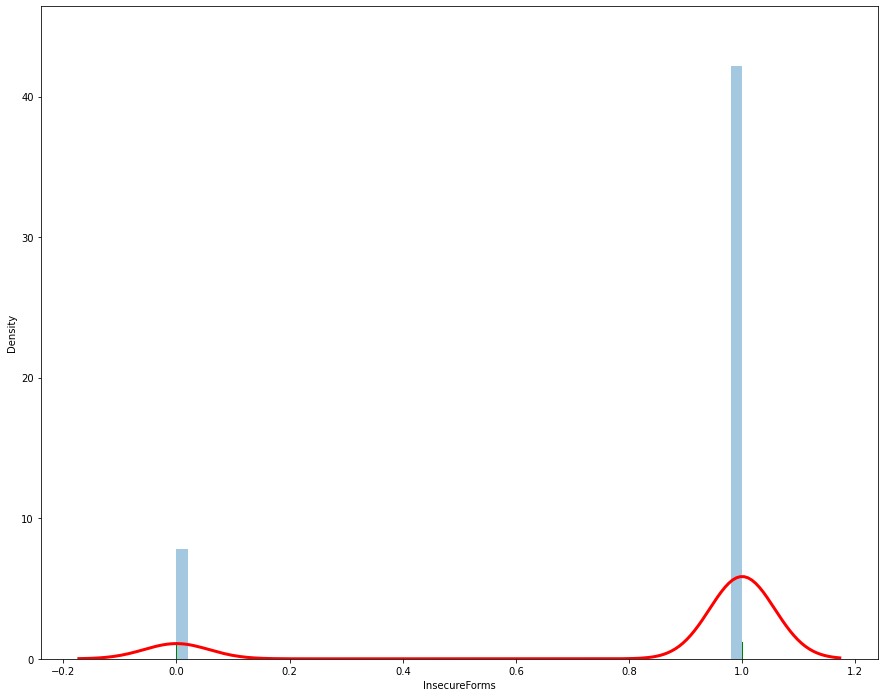

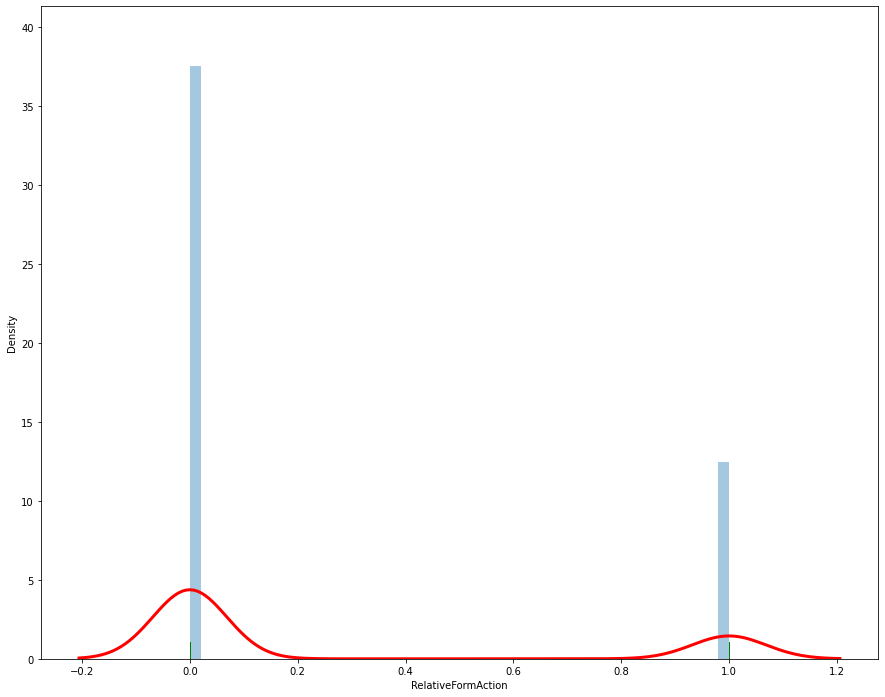

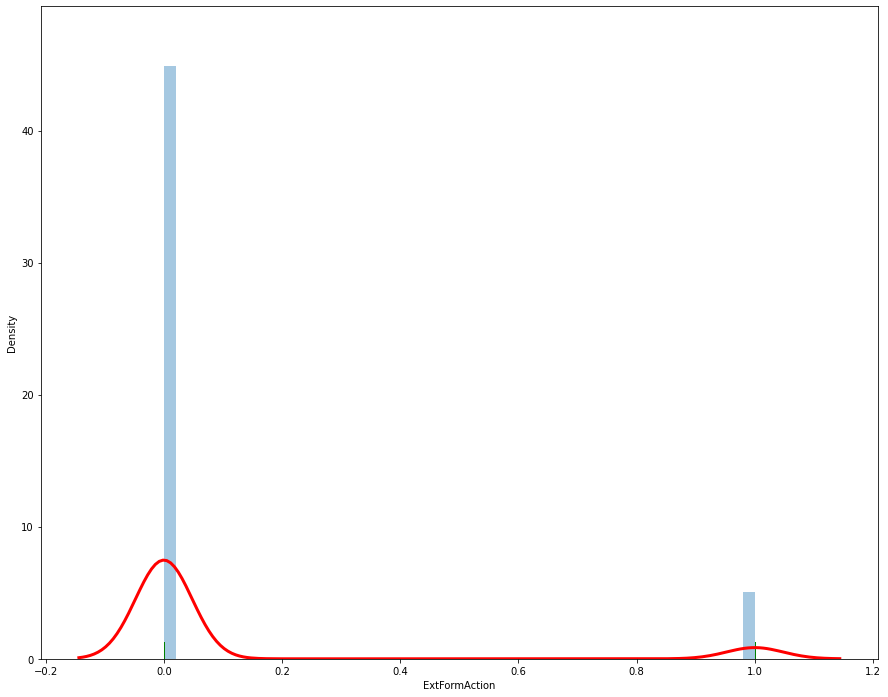

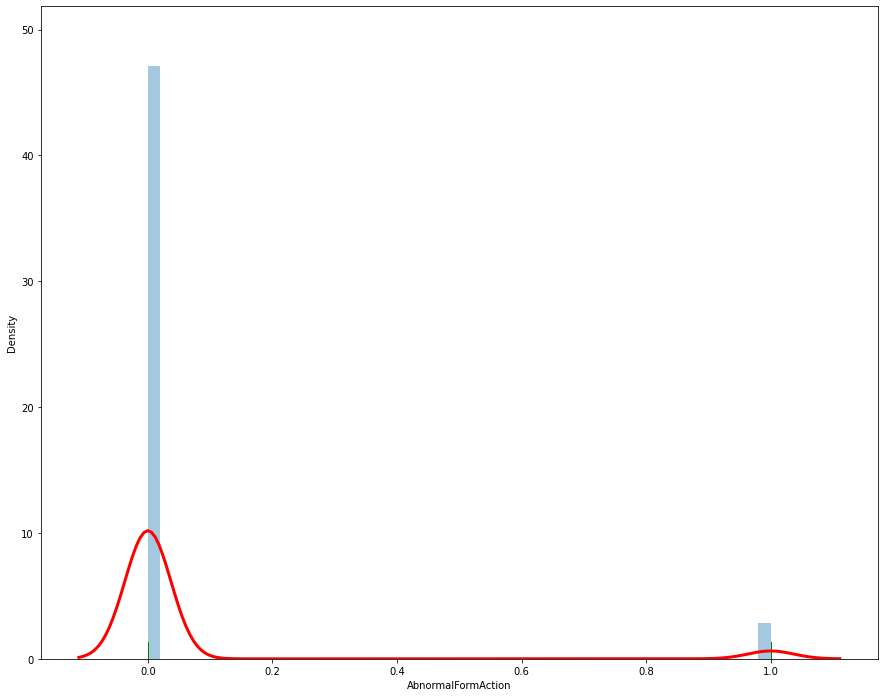

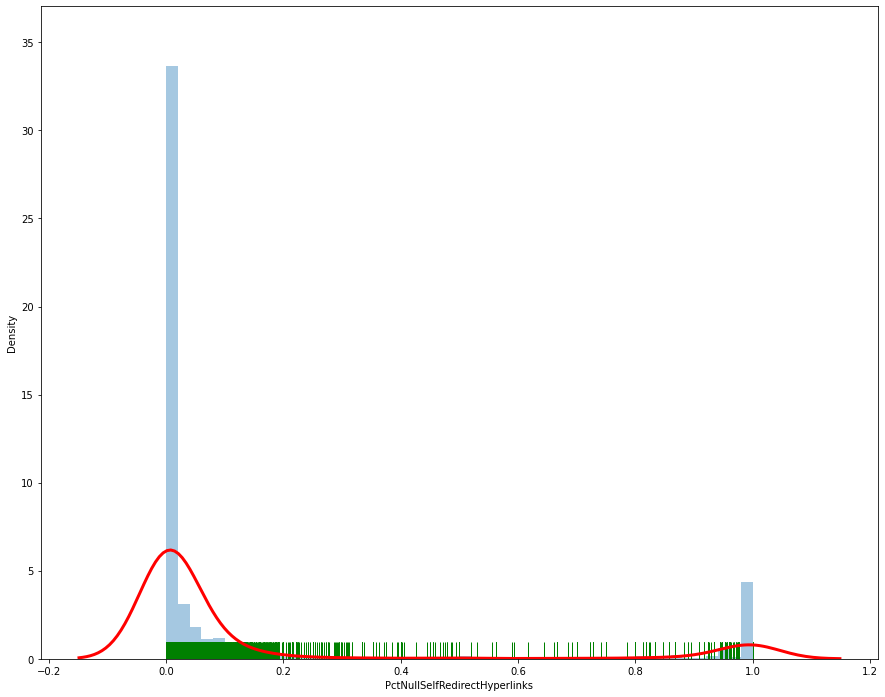

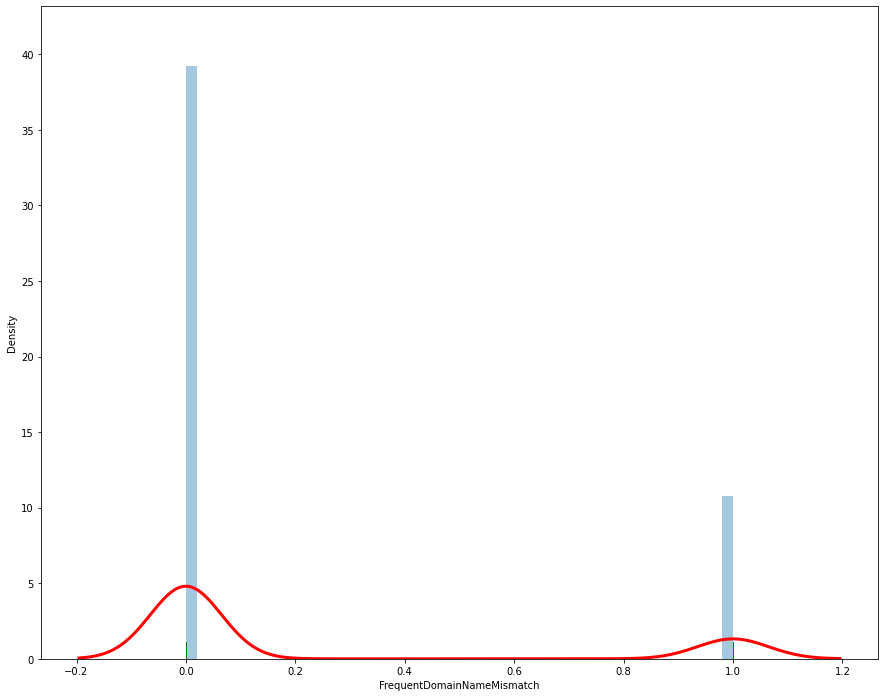

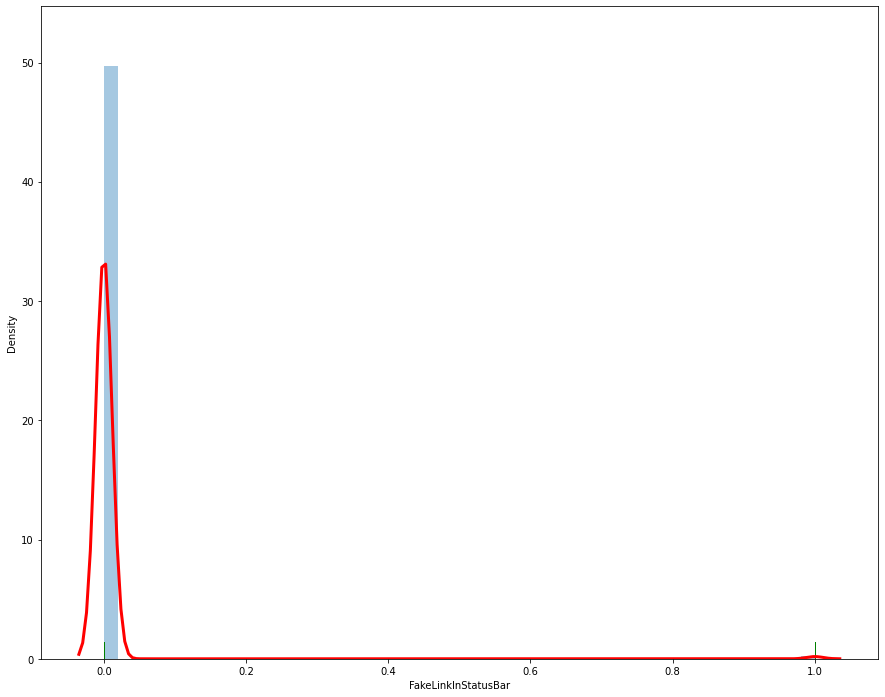

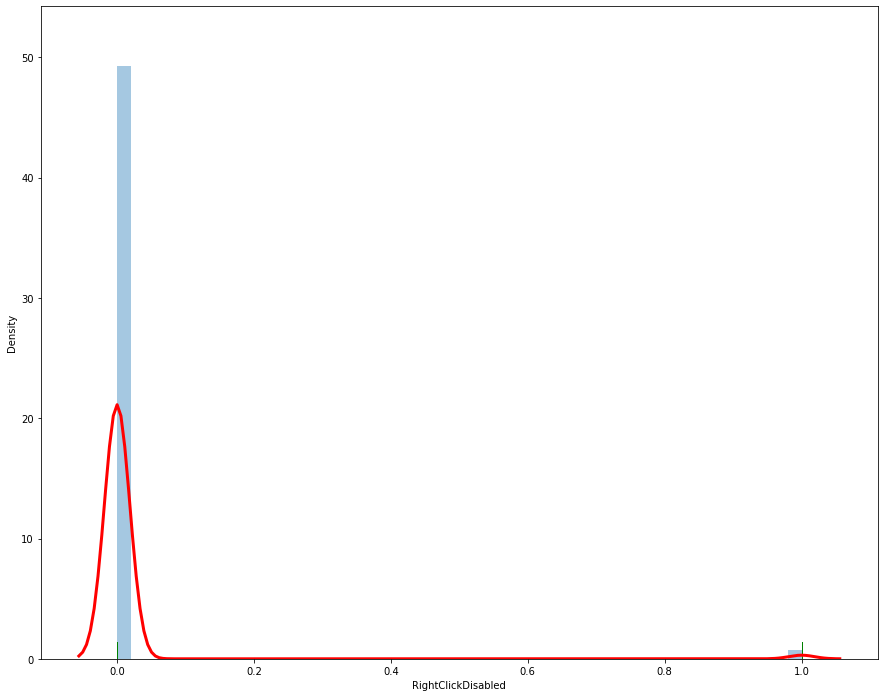

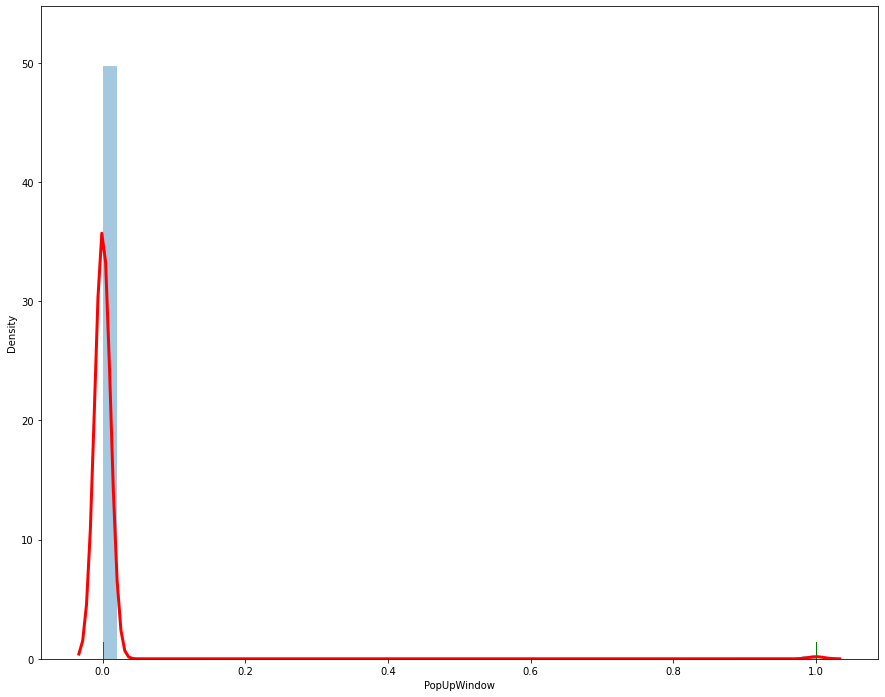

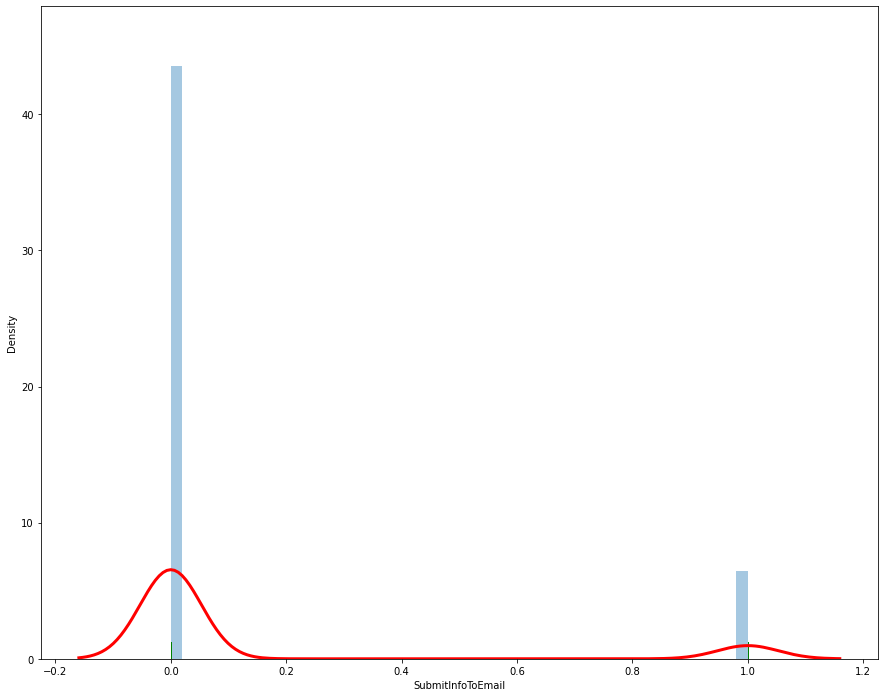

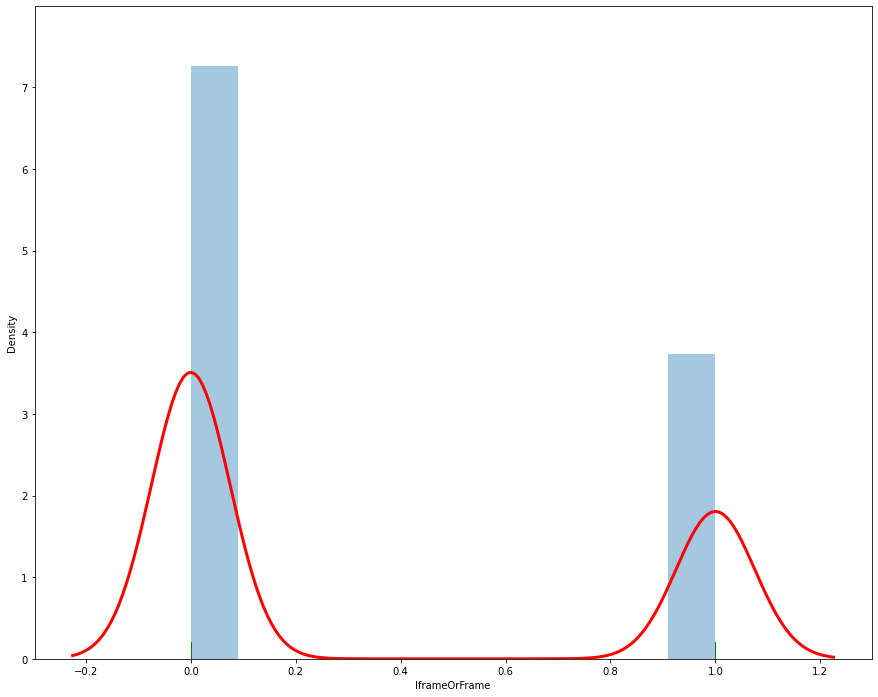

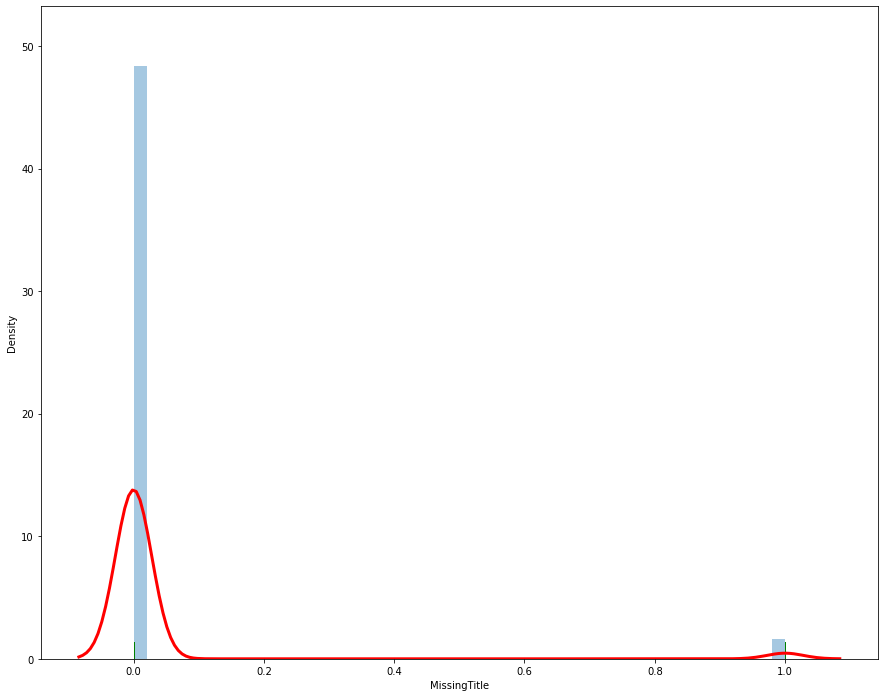

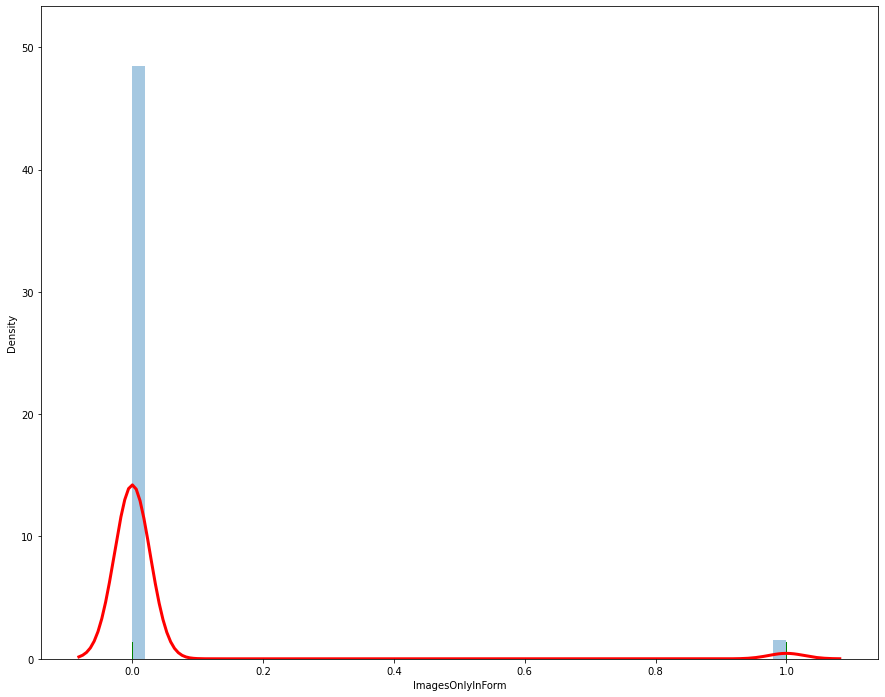

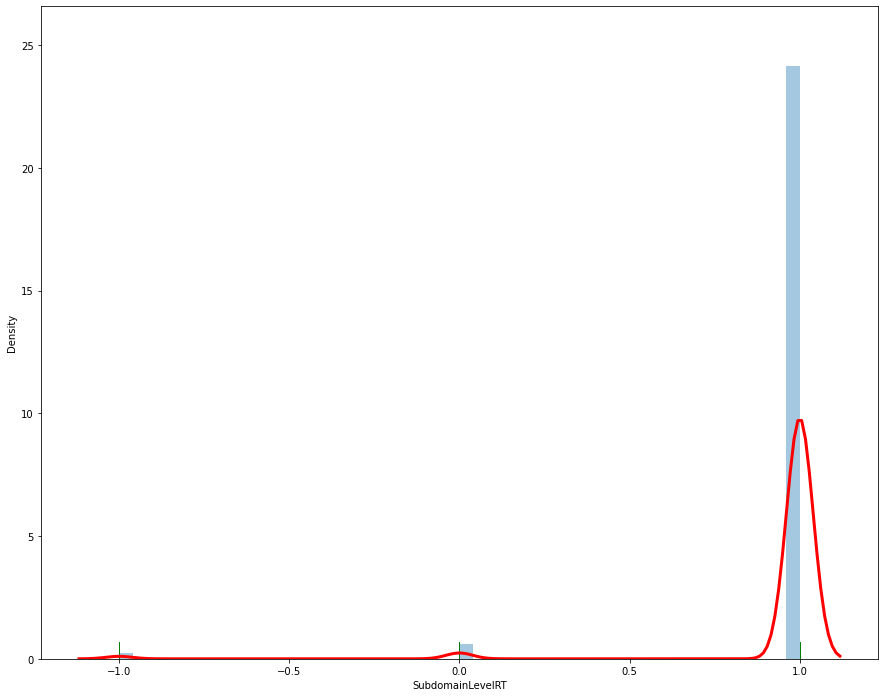

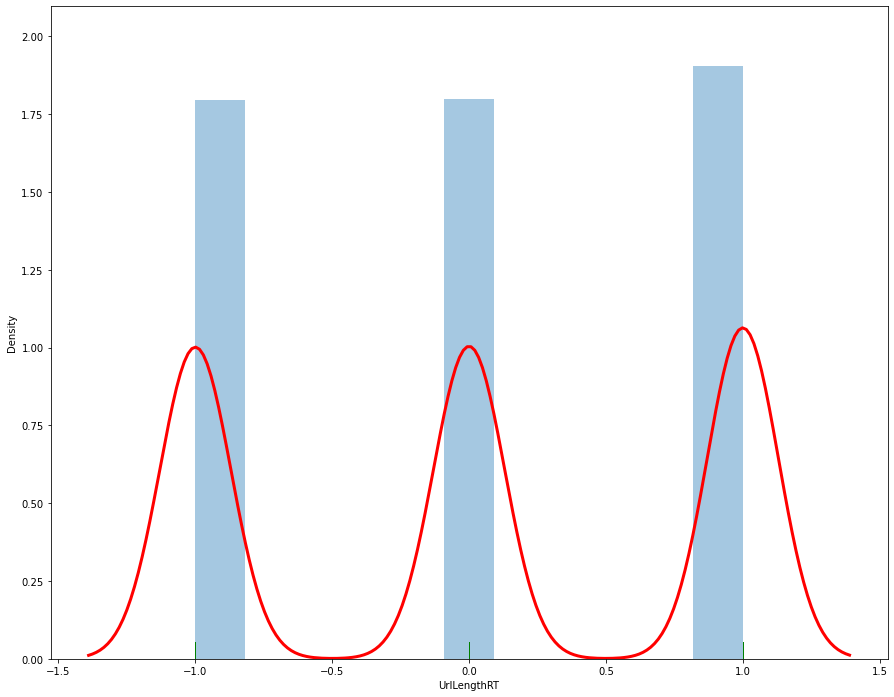

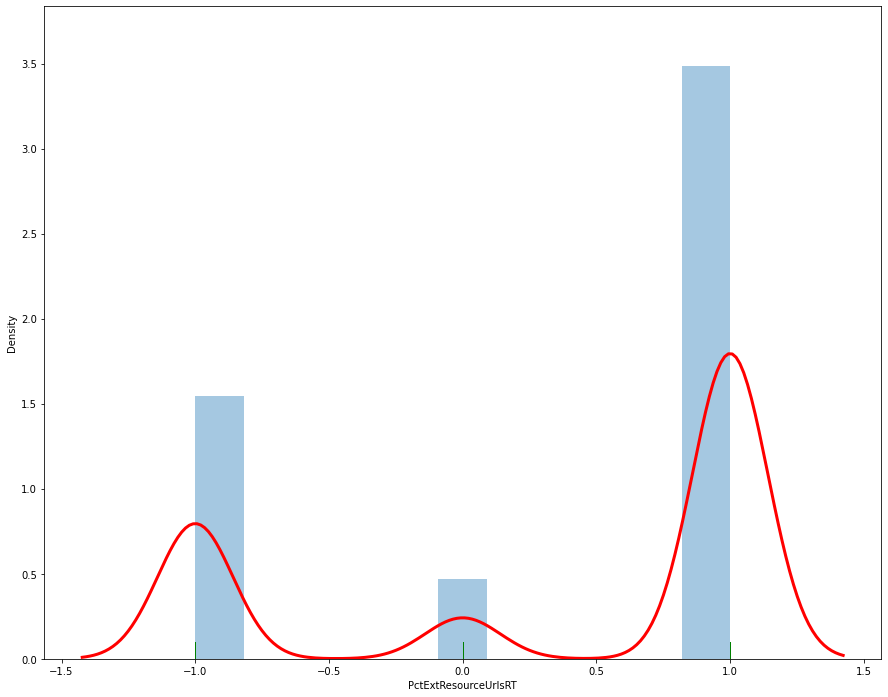

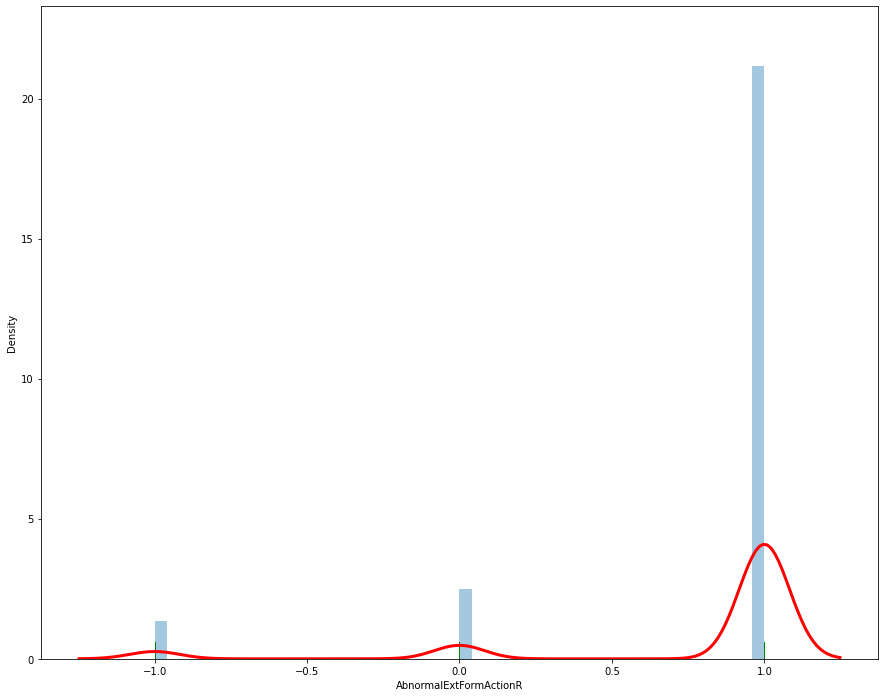

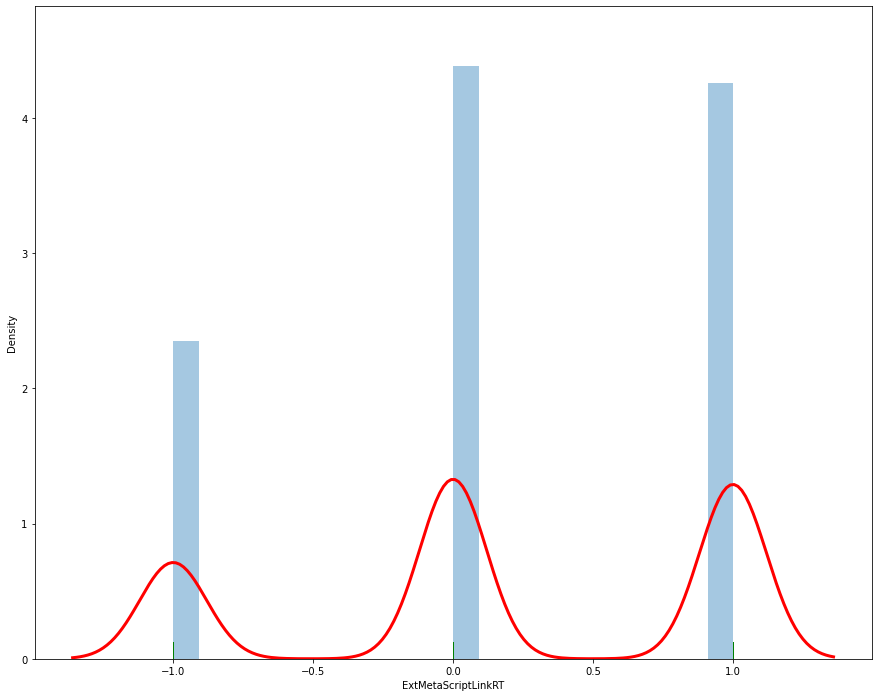

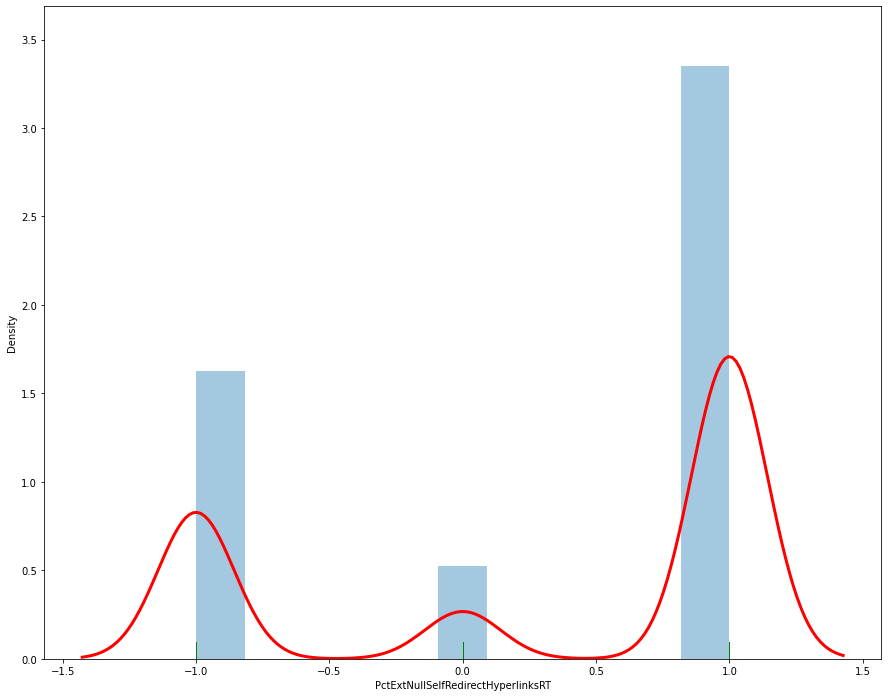

In [18]:
import warnings 
warnings.filterwarnings('ignore')


for i in num_features:
    plt.figure()
    sns.distplot(X[i], rug=True, rug_kws={"color": "g"},kde_kws={"color": "r", "lw": 3, "label": "KDE"})

#### Here we process the scores and we can see that now mutual info is showing a bit different list from spearman corr

In [19]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.699264e-01
PctExtResourceUrls                    2.897472e-01
PctNullSelfRedirectHyperlinks         2.400492e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

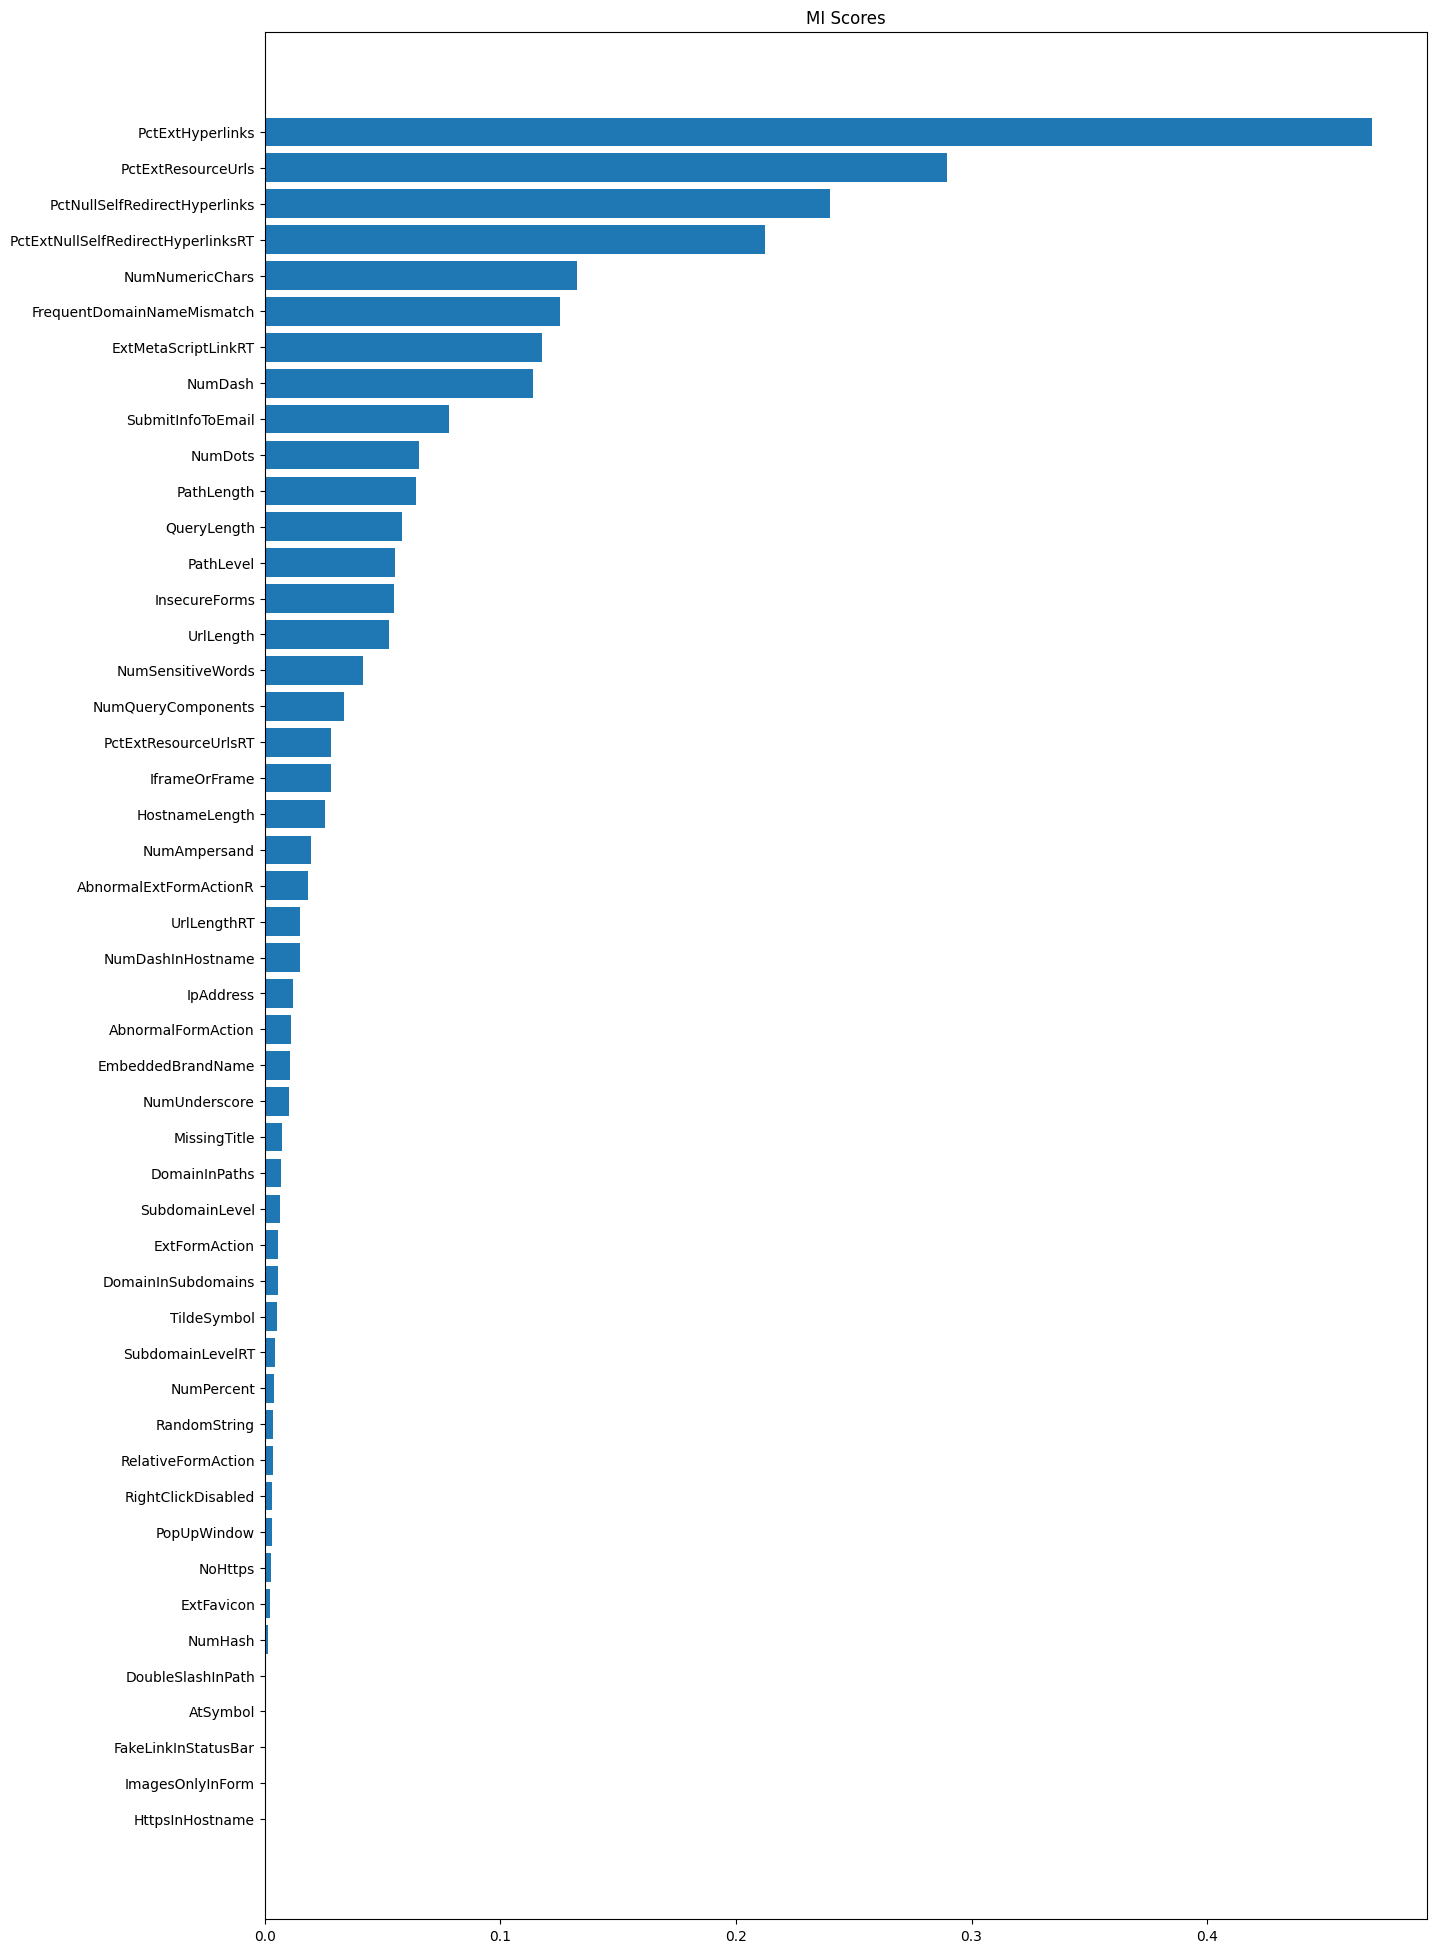

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(15,25))
plot_mi_scores(mi_scores)

## Pishing Web Page Prediction using LogisticRegression ML Algo


In [21]:
from sklearn.linear_model import LogisticRegression
# !pip install cuml
# from cuml.ensemble import RandomForestClassifier as cuRfc
from sklearn.ensemble import RandomForestClassifier as cuRfc

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Train and test of  logistic Regression models


In [22]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

Here the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem

In [23]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9105058365758755, recall : 0.9397590361445783, f1 score : 0.924901185770751, accuracy : 0.924
Performance for Logistic Model with Top 21 features is precision : 0.922233300099701, recall : 0.9268537074148296, f1 score : 0.9245377311344328, accuracy : 0.9245
Performance for Logistic Model with Top 22 features is precision : 0.9060402684563759, recall : 0.9402985074626866, f1 score : 0.9228515625, accuracy : 0.921
Performance for Logistic Model with Top 23 features is precision : 0.9252704031465093, recall : 0.928007889546351, f1 score : 0.9266371245691778, accuracy : 0.9255
Performance for Logistic Model with Top 24 features is precision : 0.9227683049147443, recall : 0.9349593495934959, f1 score : 0.9288238263503281, accuracy : 0.9295
Performance for Logistic Model with Top 25 features is precision : 0.9332023575638507, recall : 0.9443339960238568, f1 score : 0.9387351778656126, accuracy : 0.938
Performance for Logist

In [24]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.910506,0.939759,0.924901,0.9240
1,21,0.922233,0.926854,0.924538,0.9245
2,22,0.906040,0.940299,0.922852,0.9210
3,23,0.925270,0.928008,0.926637,0.9255
4,24,0.922768,0.934959,0.928824,0.9295
5,25,0.933202,0.944334,0.938735,0.9380
6,26,0.920345,0.933788,0.927018,0.9245
7,27,0.927184,0.947421,0.937193,0.9360
8,28,0.926805,0.938878,0.932802,0.9325
9,29,0.913300,0.927928,0.920556,0.9200


### Visualization and Analysis of  Logistic Regression Performance



In [25]:
'''True Positive (TP): Correctly predicting a label (we predicted “yes”, and it’s “yes”),
True Negative (TN): Correctly predicting the other label (we predicted “no”, and it’s “no”),
False Positive (FP): Falsely Predicting a label (we predicted “yes”, but it's “no”),
False Negative (FN): Missing and incoming label (we predicted “no”, but it’s “yes”).'''
                                                 
tp=cm[1,1]
tn=cm[0,0]
fp=cm[0,1]
fn=cm[1,0]
print("tp:{} \ntn:{} \nfp:{} \nfn:{}\n\n".format(tp,tn,fp,fn))

# precision tp / (tp + fp)
lr_precision=(cm[1,1]/(cm[1,1]+cm[0,1]))                                                                                                                                                             

# recall: tp / (tp + fn)
lr_recall=cm[1,1]/(cm[1,1]+cm[1,0])                                                                                                                                                                                 


# f1: 2 tp / (2 tp + fp + fn)
lr_f1_score  = 2*lr_precision*lr_recall / (lr_precision + lr_recall)                                                                                                                                          
print("precision: {} \nrecall   : {}\nf1_score : {}".format(round(lr_precision,2), round(lr_recall,2), round(lr_f1_score,2)))

NameError: name 'cm' is not defined

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cm)


categories='auto'
# plt.figure(figsize=(10,10))
# sns.heatmap(cm,  annot=True, fmt="")
sns.heatmap(cm,annot=True,fmt="",cmap='coolwarm',cbar=True, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix of Random Forest")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df.head()

# Visualize Random Forest Performance

Our goal is to beat logistic regression baseline which is

* accuracy = 0.947162
* precision = 0.957468
* recall = 0.952287
* f1_score = 0.9515



In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

### Random Forest Model (Proposed)

Lets train the final random forest model based on the optimal N number of features

In [ ]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = cuRfc(n_estimators=500) 

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

## Check the Performance Metrics of Proposed ML Algo

The model is now capable of predicting at up to 98% accuracy and also precision and recall, this shows the model has high confidence in predicting phishing or non-phishing site

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cm)


categories='auto'
plt.figure(figsize=(10,10))
# sns.heatmap(cm,  annot=True, fmt="")
sns.heatmap(cm,annot=True,fmt="",cmap='coolwarm',cbar=True, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix of Random Forest")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### ROC Curve Comparative Analysis of Logistic Regression and Random Forest 

In [ ]:
'''True Positive (TP): Correctly predicting a label (we predicted “yes”, and it’s “yes”),
True Negative (TN): Correctly predicting the other label (we predicted “no”, and it’s “no”),
False Positive (FP): Falsely Predicting a label (we predicted “yes”, but it's “no”),
False Negative (FN): Missing and incoming label (we predicted “no”, but it’s “yes”).'''
                                                 
tp=cm[1,1]
tn=cm[0,0]
fp=cm[0,1]
fn=cm[1,0]
print("tp:{} \ntn:{} \nfp:{} \nfn:{}\n\n".format(tp,tn,fp,fn))

# precision tp / (tp + fp)
rf_precision=(cm[1,1]/(cm[1,1]+cm[0,1]))                                                                                                                                                             

# recall: tp / (tp + fn)
rf_recall=cm[1,1]/(cm[1,1]+cm[1,0])                                                                                                                                                                                 


# f1: 2 tp / (2 tp + fp + fn)
rf_f1_score  = 2*rf_precision*rf_recall / (rf_precision + rf_recall)                                                                                                                                          
print(classification_report(y_test, y_pred))

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np 
 
roc_data = {'LinearRegression': [lr_precision, lr_recall, lr_f1_score],
        'RandomForest(Proposed)': [rf_precision,rf_recall,rf_f1_score],
               }
#'ROC Curve'
sns.set(font_scale=1.3, style='white')
fig, ax = plt.subplots(figsize =(15, 10))

xaxis = [ 0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]                                                                                                                                                                                                                                ; RandomForest= [0.8975, 0.9177, 0.95805, 0.96828, 0.9859, 0.9879, 0.99889, 0.9989, 0.9989, 0.990, 0.99189 ]; LinearRegression= [0.8868, 0.890787, 0.90887985, 0.9189091, 0.91082, 0.92, 0.920, 0.9302, 0.9412, 0.9432, 0.96532];                                                                                                    

plt.plot(xaxis,RandomForest, label='RandomForest(Proposed)', color='red', marker='^')

plt.plot(xaxis,LinearRegression, label='LinearRegression', color='blue', marker='*')



plt.title('ROC curves for different DL Algos')
plt.ylabel('True-Positive Rate(TPR)')
plt.xlabel('False-Positive Rate(FPR)')
plt.legend()
plt.show()